In [139]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt 
import matplotlib.cm as cm

def annualized_mean(sample_mean: float) -> float:
    return (1 + sample_mean) ** 12 - 1

def annualized_volatility(sample_std: float) -> float:
    return sample_std * np.sqrt(12)

def sharpe_ratio(mean: float, volatility: float) -> float:
    return mean / volatility

def expected_returns(returns: pd.DataFrame | pd.Series) -> pd.DataFrame | pd.Series:
    return returns.mean(axis=0)

def expected_covariance(returns: pd.DataFrame | pd.Series) -> pd.DataFrame | pd.Series:
    dimension = returns.shape[0]
    MU = expected_returns(returns)
    ER = returns - MU
    return ER.T @ ER / (dimension)

def portfolio_evaluation(monthlyReturns: pd.Series | np.ndarray, monthlyRFrate: pd.Series) -> dict:

    '''
    Evaluates the performance of a portfolio given its monthly returns. 
    It calculates and returns a dictionary containing the annualized mean return,
    annualized volatility, Sharpe ratio, minimum return, and maximum return of the portfolio.
    monthlyRFrate must be indexed by and be of same length as the sample of monthly returns 
    that is being evaluated.
    '''

    mean = monthlyReturns.mean()
    volatility = monthlyReturns.std()
    annualizedMean = annualized_mean(mean)
    annualizedVolatility = annualized_volatility(volatility)
    monthlyExcessReturn = monthlyReturns.sub(monthlyRFrate, axis=0)
    meanExcessReturn = monthlyExcessReturn.mean()
    annualizedExcessReturn = annualized_mean(meanExcessReturn)
    sharpeRatio = sharpe_ratio(annualizedExcessReturn, annualizedVolatility)
    minimum = monthlyReturns.min()
    maximum = monthlyReturns.max()

    portfolio_performance = {
        'mu': annualizedMean.iloc[-1],
        'std': annualizedVolatility.iloc[-1],
        'SR': sharpeRatio.iloc[-1],
        'min': minimum.iloc[-1],
        'max': maximum.iloc[-1]
    }

    return portfolio_performance

def MDD(monthly_return):
    monthly_return = monthly_return.iloc[:,0]
    Roll_max = monthly_return.cummax()
    drawdown = Roll_max - monthly_return
    Max_monthly_DD = drawdown.max()
    return drawdown, Max_monthly_DD


In [140]:
staticPath = 'data/Static.xlsx'
ritPath = 'data/DS_RI_T_USD_M.xlsx'
rfPath = 'data/Risk_Free_Rate.xlsx'
mvPath = 'data/DS_MV_USD_M.xlsx'
scope1Path = 'data/TC_Scope1.xlsx'  
scope2Path = 'data/TC_Scope2.xlsx'
scope3Path = 'data/TC_Scope3.xlsx'
scope1IntensityPath = 'data/TC_Scope1Intensity.xlsx'
scope2IntensityPath = 'data/TC_Scope2Intensity.xlsx'
scope3IntensityPath = 'data/TC_Scope3Intensity.xlsx'

savePaths = {
    'SAP': {
        'weights': 'data/visualization/SAP_monthly_weights.csv',
        'stats': 'data/visualization/SAP_stats.csv',
        'returns': 'data/visualization/SAP_monthly_returns.csv',
        'value': 'data/visualization/SAP_portfolio_value.csv',
        'CF': 'data/visualization/SAP_carbonFootprint.csv',
        'WACI': 'data/visualization/SAP_WACI.csv'
    },
    'SAP_50R': {
        'weights': 'data/visualization/SAP_50R_monthly_weights.csv',
        'stats': 'data/visualization/SAP_50R_stats.csv',
        'returns': 'data/visualization/SAP_50R_monthly_returns.csv',
        'value': 'data/visualization/SAP_50R_portfolio_value.csv',
        'CF': 'data/visualization/SAP_50R_carbonFootprint.csv',
        'WACI': 'data/visualization/SAP_50R_WACI.csv'
    },
    'BP': {
        'weights': 'data/visualization/BP_monthly_weights.csv',
        'stats': 'data/visualization/BP_stats.csv',
        'returns': 'data/visualization/BP_monthly_returns.csv',
        'value': 'data/visualization/BP_portfolio_value.csv',
        'CF': 'data/visualization/BP_carbonFootprint.csv',
        'WACI': 'data/visualization/BP_WACI.csv'
    },
    'BP_50R': {
        'weights': 'data/visualization/BP_50R_monthly_weights.csv',
        'stats': 'data/visualization/BP_50R_stats.csv',
        'returns': 'data/visualization/BP_50R_monthly_returns.csv',
        'value': 'data/visualization/BP_50R_portfolio_value.csv',
        'CF': 'data/visualization/BP_50R_carbonFootprint.csv',
        'WACI': 'data/visualization/BP_50R_WACI.csv'
    },
    'BP_TENZR': {
        'weights': 'data/visualization/BP_TENZR_monthly_weights.csv',
        'stats': 'data/visualization/BP_TENZR_stats.csv',
        'returns': 'data/visualization/BP_TENZR_monthly_returns.csv',
        'value': 'data/visualization/BP_TENZR_portfolio_value.csv',
        'CF': 'data/visualization/BP_TENZR_carbonFootprint.csv',
        'WACI': 'data/visualization/BP_TENZR_WACI.csv'
    }
}

staticData = pd.read_excel(staticPath)
filterEM = staticData['ISIN'][staticData['Region'] == 'EM']

masterData = pd.read_excel(ritPath, usecols=lambda x: x != 'NAME', index_col=0, engine='openpyxl').transpose()
masterData = masterData[filterEM]
masterData.index.rename('DATE', inplace=True) # print(sum(masterData.isna().any())) # Prices have no missing values

rfRate = pd.read_excel(rfPath, index_col=0, engine='openpyxl')
rfRate = rfRate.iloc[:masterData.shape[0]]
rfRate.set_index(masterData.index, inplace=True)
rfRate = rfRate.squeeze() / 100

matplotlib.rcParams["figure.dpi"] = 100
# matplotlib.rcParams["figure.dpi"] = 300

1.1 & 1.2 - SAP and BP Metrics and Cummulative Performance

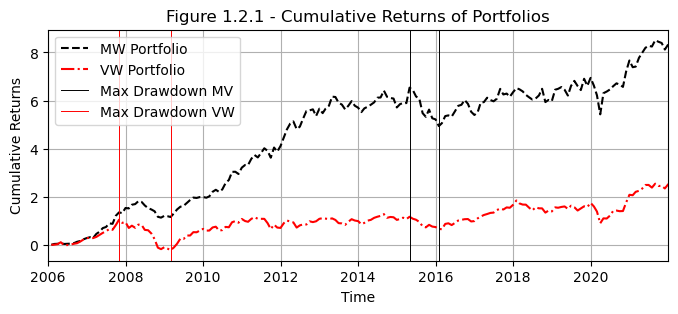

Annualized Mean Return of SAP: 0.1614
Annualized Volatility of SAP: 0.1415
Sharpe Ratio of SAP: 1.0574
Minimum Return of SAP: -0.1085
Maximum Return of SAP: 0.1717


Annualized Mean Return of BP: 0.0958
Annualized Volatility of BP: 0.2074
Sharpe Ratio of BP: 0.4067
Minimum Return of BP: -0.2662
Maximum Return of BP: 0.1853


Maximum Drawdown - SAP: 1.5973
Date of Maximum Drawdown - SAP: 2016-01-31 00:00:00
Date before Maximum Drawdown - SAP: 2015-04-30 00:00:00


Maximum Drawdown - BP: 1.2697
Date of Maximum Drawdown - BP: 2009-02-28 00:00:00
Date before Maximum Drawdown - BP: 2007-10-31 00:00:00


In [141]:
SAP = pd.read_csv(savePaths['SAP']['returns'], index_col=0, header=None, skiprows=1, parse_dates=True)
BP = pd.read_csv(savePaths['BP']['returns'], index_col=0, header=None, skiprows=1, parse_dates=True)
BP = BP[BP.index.year > 2005]

SAP_cum = (SAP + 1).cumprod() - 1
BP_cum = (BP + 1).cumprod() - 1

SAP_cum = SAP_cum - SAP_cum.iloc[0]
BP_cum = BP_cum - BP_cum.iloc[0]

drawdownSAP, MDDmonthlySAP = MDD(SAP_cum)
max_DD_date_SAP = drawdownSAP.idxmax()
peak_before_DD_SAP = SAP_cum.loc[:max_DD_date_SAP].idxmax()

drawdownBP, MDDmonthlyBP = MDD(BP_cum)
max_DD_date_BP = drawdownBP.idxmax()
peak_before_DD_BP = BP_cum.loc[:max_DD_date_BP].idxmax()

# matplotlib.rcParams["figure.dpi"] = 300

plt.figure(figsize=(8, 3))
colors = cm.viridis_r([0.4, 0.6, 0.8])
plt.gca().set_prop_cycle('color', colors)

plt.plot(SAP_cum, label='MW Portfolio', color='black', linestyle='--')
plt.plot(BP_cum, label='VW Portfolio', color='red', linestyle='-.')

plt.axvline(x=max_DD_date_SAP, color='black', linestyle='-', label='Max Drawdown MV', linewidth=0.7)
plt.axvline(x=peak_before_DD_SAP, color='black', linestyle='-', linewidth=0.7)
plt.axvline(x=max_DD_date_BP, color='red', linestyle='-', label='Max Drawdown VW', linewidth=0.7)
plt.axvline(x=peak_before_DD_BP, color='red', linestyle='-', linewidth=0.7)

plt.xlabel('Time')
plt.ylabel('Cumulative Returns')
plt.title('Figure 1.2.1 - Cumulative Returns of Portfolios')
plt.legend(loc='upper left')
plt.grid(True)
plt.xlim(pd.Timestamp('2006-01-01'), pd.Timestamp('2021-12-31'))

plt.show()


stats_SAP = portfolio_evaluation(SAP, rfRate)
stats_BP = portfolio_evaluation(BP, rfRate)

n = 4  # Rounding

print(f"Annualized Mean Return of SAP: {stats_SAP['mu']:.{n}f}")
print(f"Annualized Volatility of SAP: {stats_SAP['std']:.{n}f}")
print(f"Sharpe Ratio of SAP: {stats_SAP['SR']:.{n}f}")
print(f"Minimum Return of SAP: {stats_SAP['min']:.{n}f}")
print(f"Maximum Return of SAP: {stats_SAP['max']:.{n}f}")
print('\n')

print(f"Annualized Mean Return of BP: {stats_BP['mu']:.{n}f}")
print(f"Annualized Volatility of BP: {stats_BP['std']:.{n}f}")
print(f"Sharpe Ratio of BP: {stats_BP['SR']:.{n}f}")
print(f"Minimum Return of BP: {stats_BP['min']:.{n}f}")
print(f"Maximum Return of BP: {stats_BP['max']:.{n}f}")
print('\n')

print(f'Maximum Drawdown - SAP: {MDDmonthlySAP:.{n}f}')
print(f'Date of Maximum Drawdown - SAP: {max_DD_date_SAP}')
print(f'Date before Maximum Drawdown - SAP: {peak_before_DD_SAP.iloc[-1]}')
print('\n')

print(f'Maximum Drawdown - BP: {MDDmonthlyBP:.{n}f}')
print(f'Date of Maximum Drawdown - BP: {max_DD_date_BP}')
print(f'Date before Maximum Drawdown - BP: {peak_before_DD_BP.iloc[-1]}')


1.1 & 1.2 - Sectoral Differences Between SAP and BP

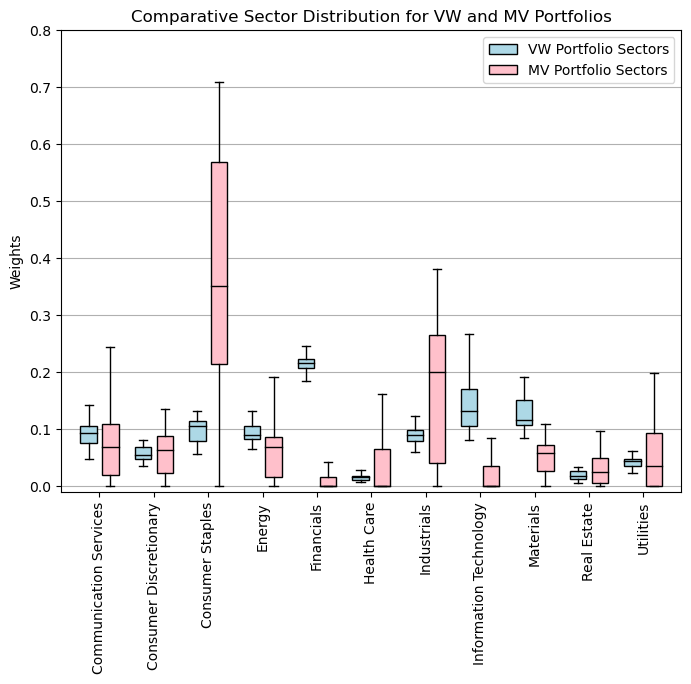

In [142]:
portfolio_weights_sap = pd.read_csv(savePaths['SAP']['weights'], index_col=0, parse_dates=True)
static_info_sap = staticData.set_index('ISIN').loc[portfolio_weights_sap.columns]
merged_data_sap = portfolio_weights_sap.T.join(static_info_sap, how='left')
sector_weights_sap = merged_data_sap.groupby('GICSSectorName').sum(numeric_only=True).T

portfolio_weights_bp = pd.read_csv(savePaths['BP']['weights'], index_col=0, parse_dates=True)
static_info_bp = staticData.set_index('ISIN').loc[portfolio_weights_bp.columns]
merged_data_bp = portfolio_weights_bp.T.join(static_info_bp, how='left')
sector_weights_bp = merged_data_bp.groupby('GICSSectorName').sum(numeric_only=True).T

common_sectors = sector_weights_sap.columns.intersection(sector_weights_bp.columns)
data_group1 = sector_weights_bp[common_sectors]
data_group2 = sector_weights_sap[common_sectors]
data_groups = [data_group1.values, data_group2.values]
labels = common_sectors.tolist()

# matplotlib.rcParams["figure.dpi"] = 300
fig, ax = plt.subplots(figsize=(8, 6))
positions1 = [x - 0.2 for x in range(len(labels))]
positions2 = [x + 0.2 for x in range(len(labels))]


bp1 = ax.boxplot(data_groups[0], positions=positions1, widths=0.3, patch_artist=True, boxprops=dict(facecolor='lightblue'), showfliers=False, medianprops=dict(color='black'))
bp2 = ax.boxplot(data_groups[1], positions=positions2, widths=0.3, patch_artist=True, boxprops=dict(facecolor='pink'), showfliers=False, medianprops=dict(color='black'))

ax.set_xticks(range(len(labels)))
ax.set_xticklabels(labels, rotation=90)
ax.set_title('Comparative Sector Distribution for VW and MV Portfolios')
# ax.set_xlabel('Sectors')
ax.set_ylabel('Weights')
ax.grid(axis='y')
ax.legend([bp1["boxes"][0], bp2["boxes"][0]], ['VW Portfolio Sectors', 'MV Portfolio Sectors'], loc='upper right')
ax.set_ylim(-0.01, 0.8)
plt.show()

1.1 & 1.2 - Sectoral Weight Deviations SAP and BP

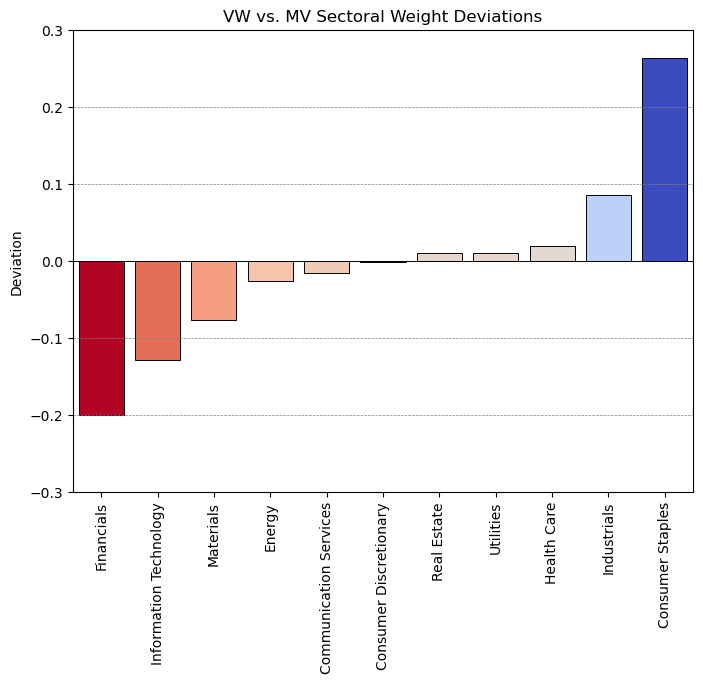

In [143]:
portfolio_weights_1 = pd.read_csv(savePaths['BP']['weights'], index_col=0, parse_dates=True)
portfolio_weights_2 = pd.read_csv(savePaths['SAP']['weights'], index_col=0, parse_dates=True)
static_info = staticData.set_index('ISIN')
static_info_1 = static_info.loc[portfolio_weights_1.columns]
merged_data_1 = portfolio_weights_1.T.join(static_info, how='left')
sector_weights_1 = merged_data_1.groupby(['GICSSectorName']).sum(numeric_only=True).T
mean_weights_1 = sector_weights_1.mean()

static_info_2 = static_info.loc[portfolio_weights_2.columns]
merged_data_2 = portfolio_weights_2.T.join(static_info, how='left')
sector_weights_2 = merged_data_2.groupby(['GICSSectorName']).sum(numeric_only=True).T
mean_weights_2 = sector_weights_2.mean()

weight_differences = (mean_weights_2 - mean_weights_1).sort_values(ascending=True)

norm = plt.Normalize(weight_differences.min(), weight_differences.max())
colors = cm.coolwarm_r(norm(weight_differences.values))

# matplotlib.rcParams["figure.dpi"] = 300
plt.figure(figsize=(8, 6))
plt.bar(weight_differences.index, weight_differences, color=colors, edgecolor='k', linewidth=0.7)   
plt.ylabel('Deviation')
plt.title('VW vs. MV Sectoral Weight Deviations')
plt.grid(False, axis='x')
plt.grid(True, axis='y', linestyle='--', linewidth=0.5, color='gray')
plt.xticks(rotation=90)
plt.hlines(0, -2, 12, color='black', linestyle='-', linewidth=0.7)
plt.xlim(-0.5, 10.5)
plt.ylim(-0.3, 0.3)

plt.show()

sorted_columns = weight_differences.sort_values(ascending=True).index

2.1 - Carbon Footprint

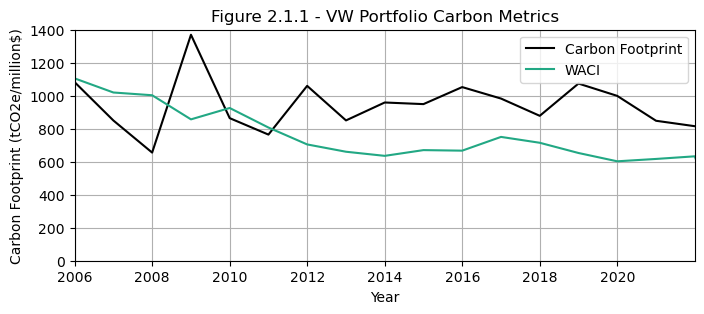

In [144]:
BP_CF = pd.read_csv(savePaths['BP']['CF'], index_col=0, header=None, skiprows=1, parse_dates=True)
BP_WACI = pd.read_csv(savePaths['BP']['WACI'], index_col=0, header=None, skiprows=1, parse_dates=True)

# matplotlib.rcParams["figure.dpi"] = 300
plt.figure(figsize=(8, 3))
colors = cm.viridis_r([0.4, 0.6, 0.8])
plt.gca().set_prop_cycle('color', colors)

plt.plot(BP_CF, label='Carbon Footprint', color='black')
plt.plot(BP_WACI, label='WACI')

plt.title('Figure 2.1.1 - VW Portfolio Carbon Metrics')
plt.xlabel('Year')
plt.ylabel('Carbon Footprint (tCO2e/million$)')
plt.legend()
plt.grid(True)
plt.xlim(pd.Timestamp('2006-01-01'), pd.Timestamp('2021-12-31'))
plt.ylim(0, 1400)
plt.show()

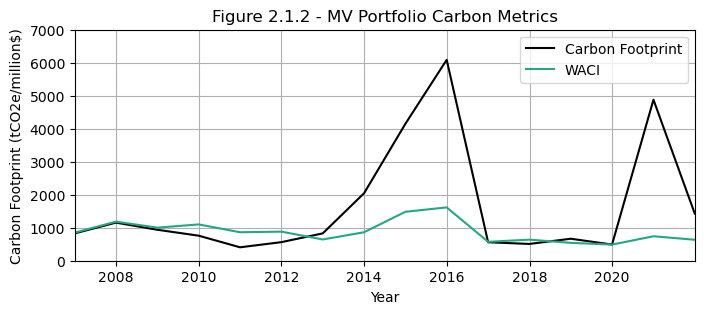

In [145]:
SAP_CF = pd.read_csv(savePaths['SAP']['CF'], index_col=0, header=None, skiprows=1, parse_dates=True)
SAP_WACI = pd.read_csv(savePaths['SAP']['WACI'], index_col=0, header=None, skiprows=1, parse_dates=True)

# matplotlib.rcParams["figure.dpi"] = 300
plt.figure(figsize=(8, 3))
colors = cm.viridis_r([0.4, 0.6, 0.8])
plt.gca().set_prop_cycle('color', colors)

plt.plot(SAP_CF, label='Carbon Footprint', color='black')
plt.plot(SAP_WACI, label='WACI')

plt.title('Figure 2.1.2 - MV Portfolio Carbon Metrics')
plt.xlabel('Year')
plt.ylabel('Carbon Footprint (tCO2e/million$)')
plt.legend()
plt.grid(True)
plt.xlim(pd.Timestamp('2007-01-01'), pd.Timestamp('2021-12-31'))
plt.ylim(0, 7000)
plt.show()

2.2 - SAP with 50% Reduction

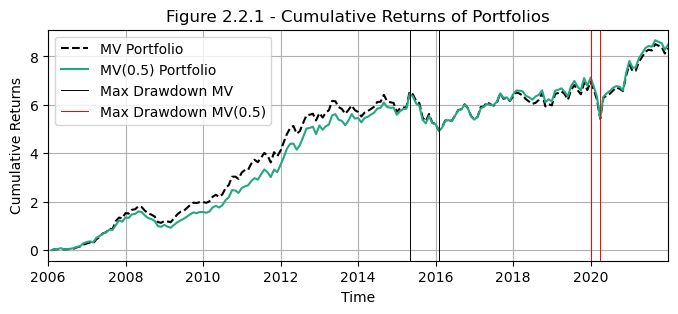

Annualized Mean Return of SAP: 0.1614
Annualized Volatility of SAP: 0.1415
Sharpe Ratio of SAP: 1.0574
Minimum Return of SAP: -0.1085
Maximum Return of SAP: 0.1717


Annualized Mean Return of SAP_50R: 0.1622
Annualized Volatility of SAP_50R: 0.1380
Sharpe Ratio of SAP_50R: 1.0893
Minimum Return of SAP_50R: -0.1204
Maximum Return of SAP_50R: 0.1366


Maximum Drawdown - SAP: 1.5973
Date of Maximum Drawdown - SAP: 2016-01-31 00:00:00
Date before Maximum Drawdown - SAP: 2015-04-30 00:00:00


Maximum Drawdown - SAP_50R: 1.6815
Date of Maximum Drawdown - SAP_50R: 2020-03-31 00:00:00
Date before Maximum Drawdown - SAP_50R: 2019-12-31 00:00:00


In [146]:
SAP = pd.read_csv(savePaths['SAP']['returns'], index_col=0, header=None, skiprows=1, parse_dates=True)
SAP_50R = pd.read_csv(savePaths['SAP_50R']['returns'], index_col=0, header=None, skiprows=1, parse_dates=True)

SAP_cum = (SAP + 1).cumprod() - 1
SAP_50R_cum = (SAP_50R + 1).cumprod() - 1

SAP_cum = SAP_cum - SAP_cum.iloc[0]
SAP_50R_cum = SAP_50R_cum - SAP_50R_cum.iloc[0]

drawdownSAP, MDDmonthlySAP = MDD(SAP_cum)
max_DD_date_SAP = drawdownSAP.idxmax()
peak_before_DD_SAP = SAP_cum.loc[:max_DD_date_SAP].idxmax()

drawdownSAP_50R, MDDmonthlySAP_50R = MDD(SAP_50R_cum)
max_DD_date_SAP_50R = drawdownSAP_50R.idxmax()
peak_before_DD_SAP_50R = SAP_50R_cum.loc[:max_DD_date_SAP_50R].idxmax()

# matplotlib.rcParams["figure.dpi"] = 300
plt.figure(figsize=(8, 3))
colors = cm.viridis_r([0.4, 0.6, 0.8])
plt.gca().set_prop_cycle('color', colors)

plt.plot(SAP_cum, label='MV Portfolio', color='black', linestyle='--')
plt.plot(SAP_50R_cum, label='MV(0.5) Portfolio', linestyle='-')

plt.axvline(x=max_DD_date_SAP, color='black', linestyle='-', label='Max Drawdown MV', linewidth=0.7)
plt.axvline(x=peak_before_DD_SAP, color='black', linestyle='-', linewidth=0.7)
plt.axvline(x=max_DD_date_SAP_50R, color='red', linestyle='-', label='Max Drawdown MV(0.5)', linewidth=0.7)
plt.axvline(x=peak_before_DD_SAP_50R, color='red', linestyle='-', linewidth=0.7)

plt.xlabel('Time')
plt.ylabel('Cumulative Returns')
plt.title('Figure 2.2.1 - Cumulative Returns of Portfolios')
plt.legend()
plt.grid(True)
plt.xlim(pd.Timestamp('2006-01-01'), pd.Timestamp('2021-12-31'))

plt.show()

stats_SAP = portfolio_evaluation(SAP, rfRate)
stats_SAP_50R = portfolio_evaluation(SAP_50R, rfRate)

n = 4  # Rounding

print(f"Annualized Mean Return of SAP: {stats_SAP['mu']:.{n}f}")
print(f"Annualized Volatility of SAP: {stats_SAP['std']:.{n}f}")
print(f"Sharpe Ratio of SAP: {stats_SAP['SR']:.{n}f}")
print(f"Minimum Return of SAP: {stats_SAP['min']:.{n}f}")
print(f"Maximum Return of SAP: {stats_SAP['max']:.{n}f}")
print('\n')

print(f"Annualized Mean Return of SAP_50R: {stats_SAP_50R['mu']:.{n}f}")
print(f"Annualized Volatility of SAP_50R: {stats_SAP_50R['std']:.{n}f}")
print(f"Sharpe Ratio of SAP_50R: {stats_SAP_50R['SR']:.{n}f}")
print(f"Minimum Return of SAP_50R: {stats_SAP_50R['min']:.{n}f}")
print(f"Maximum Return of SAP_50R: {stats_SAP_50R['max']:.{n}f}")
print('\n')

print(f'Maximum Drawdown - SAP: {MDDmonthlySAP:.{n}f}')
print(f'Date of Maximum Drawdown - SAP: {max_DD_date_SAP}')
print(f'Date before Maximum Drawdown - SAP: {peak_before_DD_SAP.iloc[-1]}')
print('\n')

print(f'Maximum Drawdown - SAP_50R: {MDDmonthlySAP_50R:.{n}f}')
print(f'Date of Maximum Drawdown - SAP_50R: {max_DD_date_SAP_50R}')
print(f'Date before Maximum Drawdown - SAP_50R: {peak_before_DD_SAP_50R.iloc[-1]}')


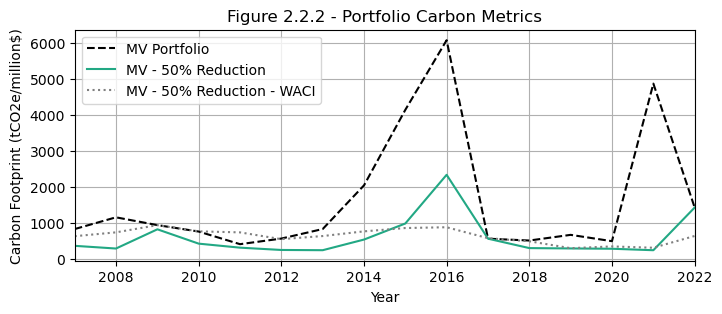

In [147]:
SAP_CF = pd.read_csv(savePaths['SAP']['CF'], index_col=0, header=None, skiprows=1, parse_dates=True)
SAP_WACI = pd.read_csv(savePaths['SAP']['WACI'], index_col=0, header=None, skiprows=1, parse_dates=True)
SAP_50R_CF = pd.read_csv(savePaths['SAP_50R']['CF'], index_col=0, header=None, skiprows=1, parse_dates=True)
SAP_50R_WACI = pd.read_csv(savePaths['SAP_50R']['WACI'], index_col=0, header=None, skiprows=1, parse_dates=True)

# matplotlib.rcParams["figure.dpi"] = 300
plt.figure(figsize=(8, 3))
colors = cm.viridis_r([0.4, 0.6, 0.8])
plt.gca().set_prop_cycle('color', colors)

plt.plot(SAP_CF, label='MV Portfolio', color='black', linestyle='--')
plt.plot(SAP_50R_CF, label='MV - 50% Reduction')
plt.plot(SAP_50R_WACI, label='MV - 50% Reduction - WACI', color='grey', alpha=1, linestyle=':')

plt.title('Figure 2.2.2 - Portfolio Carbon Metrics')
plt.xlabel('Year')
plt.ylabel('Carbon Footprint (tCO2e/million$)')
plt.legend()
plt.grid(True)
plt.xlim(pd.Timestamp('2007-01-01'), pd.Timestamp('2022-01-01'))
plt.show()

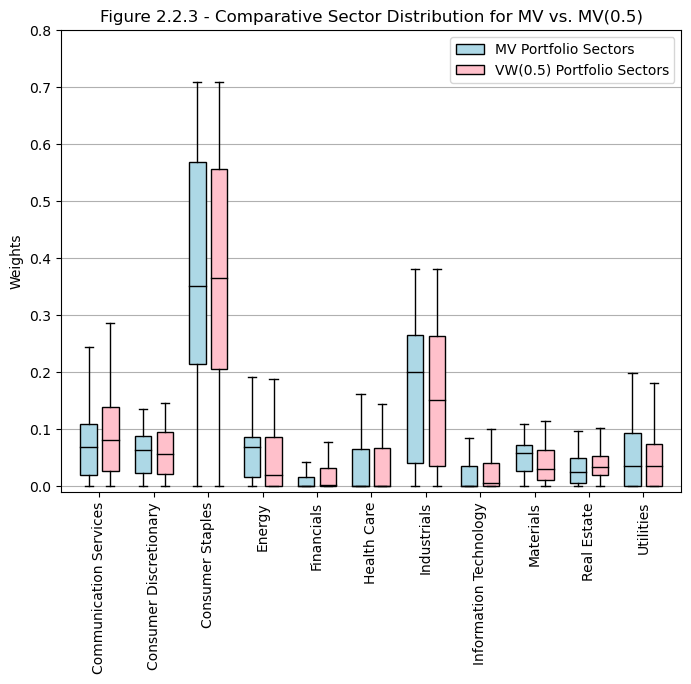

In [148]:
portfolio_weights_sap = pd.read_csv(savePaths['SAP']['weights'], index_col=0, parse_dates=True)
static_info_sap = staticData.set_index('ISIN').loc[portfolio_weights_sap.columns]
merged_data_sap = portfolio_weights_sap.T.join(static_info_sap, how='left')
sector_weights_sap = merged_data_sap.groupby('GICSSectorName').sum(numeric_only=True).T

portfolio_weights_sap_50R = pd.read_csv(savePaths['SAP_50R']['weights'], index_col=0, parse_dates=True)
static_info_sap_50R = staticData.set_index('ISIN').loc[portfolio_weights_sap_50R.columns]
merged_data_sap_50R = portfolio_weights_sap_50R.T.join(static_info_sap_50R, how='left')
sector_weights_sap_50R = merged_data_sap_50R.groupby('GICSSectorName').sum(numeric_only=True).T

common_sectors = sector_weights_sap.columns.intersection(sector_weights_sap_50R.columns)
data_group1 = sector_weights_sap[common_sectors]
data_group2 = sector_weights_sap_50R[common_sectors]

data_groups = [data_group1.values, data_group2.values]
labels = common_sectors.tolist()

# matplotlib.rcParams["figure.dpi"] = 300
fig, ax = plt.subplots(figsize=(8, 6))
positions1 = [x - 0.2 for x in range(len(labels))]
positions2 = [x + 0.2 for x in range(len(labels))]


bp1 = ax.boxplot(data_groups[0], positions=positions1, widths=0.3, patch_artist=True, boxprops=dict(facecolor='lightblue'), showfliers=False, medianprops=dict(color='black'))
bp2 = ax.boxplot(data_groups[1], positions=positions2, widths=0.3, patch_artist=True, boxprops=dict(facecolor='pink'), showfliers=False, medianprops=dict(color='black'))

ax.set_xticks(range(len(labels)))
ax.set_xticklabels(labels, rotation=90)
ax.set_title('Figure 2.2.3 - Comparative Sector Distribution for MV vs. MV(0.5)')
# ax.set_xlabel('Sectors')
ax.set_ylabel('Weights')
ax.grid(axis='y')
ax.legend([bp1["boxes"][0], bp2["boxes"][0]], ['MV Portfolio Sectors', 'VW(0.5) Portfolio Sectors'], loc='upper right')
ax.set_ylim(-0.01, 0.8)
plt.show()

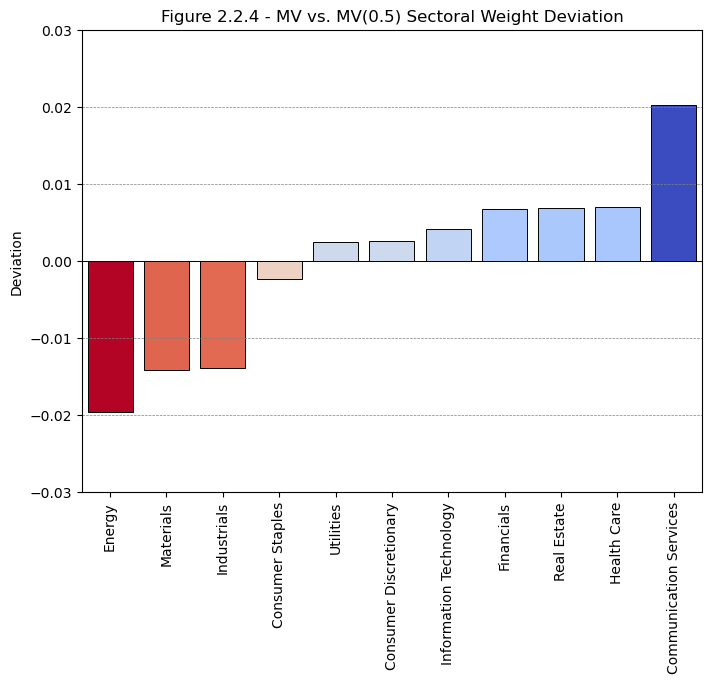

In [149]:
from matplotlib.colors import LinearSegmentedColormap, Normalize

portfolio_weights_1 = pd.read_csv(savePaths['SAP']['weights'], index_col=0, parse_dates=True)
portfolio_weights_2 = pd.read_csv(savePaths['SAP_50R']['weights'], index_col=0, parse_dates=True)
static_info = staticData.set_index('ISIN')
static_info_1 = static_info.loc[portfolio_weights_1.columns]
merged_data_1 = portfolio_weights_1.T.join(static_info, how='left')
sector_weights_1 = merged_data_1.groupby(['GICSSectorName']).sum(numeric_only=True).T
mean_weights_1 = sector_weights_1.mean()

static_info_2 = static_info.loc[portfolio_weights_2.columns]
merged_data_2 = portfolio_weights_2.T.join(static_info, how='left')
sector_weights_2 = merged_data_2.groupby(['GICSSectorName']).sum(numeric_only=True).T
mean_weights_2 = sector_weights_2.mean()

weight_differences = (mean_weights_2 - mean_weights_1).sort_values(ascending=True)

norm = plt.Normalize(weight_differences.min(), weight_differences.max())
colors = cm.coolwarm_r(norm(weight_differences.values))

# matplotlib.rcParams["figure.dpi"] = 300
plt.figure(figsize=(8, 6))
plt.bar(weight_differences.index, weight_differences, color=colors, edgecolor='k', linewidth=0.7)   
plt.ylabel('Deviation')
plt.title('Figure 2.2.4 - MV vs. MV(0.5) Sectoral Weight Deviation')
plt.grid(False, axis='x')
plt.grid(True, axis='y', linestyle='--', linewidth=0.5, color='gray')
plt.xticks(rotation=90)
plt.hlines(0, -2, 12, color='black', linestyle='-', linewidth=0.7)
plt.xlim(-0.5, 10.5)
plt.ylim(-0.03, 0.03)

plt.show()

sorted_columns = weight_differences.sort_values(ascending=True).index

2.3 - Benchmark Portfolio - 50% reduction

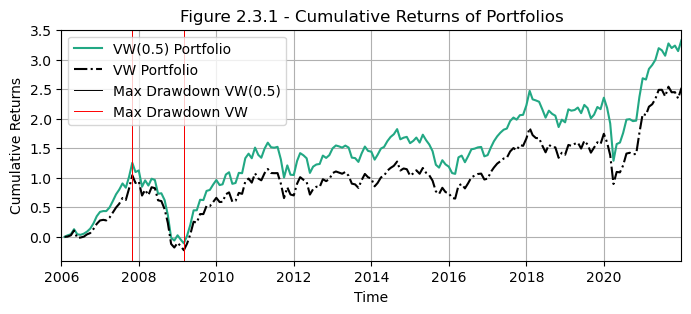

Annualized Mean Return of BP_50R: 0.1214
Annualized Volatility of BP_50R: 0.2071
Sharpe Ratio of BP_50R: 0.5308
Minimum Return of BP_50R: -0.2627
Maximum Return of BP_50R: 0.1878


Annualized Mean Return of BP: 0.0958
Annualized Volatility of BP: 0.2074
Sharpe Ratio of BP: 0.4067
Minimum Return of BP: -0.2662
Maximum Return of BP: 0.1853


Maximum Drawdown - BP_50R: 1.3631
Date of Maximum Drawdown - BP_50R: 2009-02-28 00:00:00
Date before Maximum Drawdown - BP_50R: 2007-10-31 00:00:00


Maximum Drawdown - BP: 1.2697
Date of Maximum Drawdown - BP: 2009-02-28 00:00:00
Date before Maximum Drawdown - BP: 2007-10-31 00:00:00


In [150]:
BP_50R = pd.read_csv(savePaths['BP_50R']['returns'], index_col=0, header=None, skiprows=1, parse_dates=True)
BP = pd.read_csv(savePaths['BP']['returns'], index_col=0, header=None, skiprows=1, parse_dates=True)
BP = BP[BP.index.year > 2005]

BP_50R_cum = (BP_50R + 1).cumprod() - 1
BP_cum = (BP + 1).cumprod() - 1

BP_50R_cum = BP_50R_cum - BP_50R_cum.iloc[0]
BP_cum = BP_cum - BP_cum.iloc[0]

drawdownBP_50R, MDDmonthlyBP_50R = MDD(BP_50R_cum)
max_DD_date_BP_50R = drawdownBP_50R.idxmax()
peak_before_DD_BP_50R = BP_50R_cum.loc[:max_DD_date_BP_50R].idxmax()

drawdownBP, MDDmonthlyBP = MDD(BP_cum)
max_DD_date_BP = drawdownBP.idxmax()
peak_before_DD_BP = BP_cum.loc[:max_DD_date_BP].idxmax()

# matplotlib.rcParams["figure.dpi"] = 300
plt.figure(figsize=(8, 3))
colors = cm.viridis_r([0.4, 0.6, 0.8])
plt.gca().set_prop_cycle('color', colors)

plt.plot(BP_50R_cum, label='VW(0.5) Portfolio', linestyle='-')
plt.plot(BP_cum, label='VW Portfolio', color='black', linestyle='-.')

plt.axvline(x=max_DD_date_BP_50R, color='black', linestyle='-', label='Max Drawdown VW(0.5)', linewidth=0.7)
plt.axvline(x=peak_before_DD_BP_50R, color='black', linestyle='-', linewidth=0.7)
plt.axvline(x=max_DD_date_BP, color='red', linestyle='-', label='Max Drawdown VW', linewidth=0.7)
plt.axvline(x=peak_before_DD_BP, color='red', linestyle='-', linewidth=0.7)

plt.xlabel('Time')
plt.ylabel('Cumulative Returns')
plt.title('Figure 2.3.1 - Cumulative Returns of Portfolios')
plt.legend(loc='upper left')
plt.grid(True)
plt.xlim(pd.Timestamp('2006-01-01'), pd.Timestamp('2021-12-31'))

plt.show()

stats_BP_50R = portfolio_evaluation(BP_50R, rfRate)
stats_BP = portfolio_evaluation(BP, rfRate)

n = 4  # Rounding

print(f"Annualized Mean Return of BP_50R: {stats_BP_50R['mu']:.{n}f}")
print(f"Annualized Volatility of BP_50R: {stats_BP_50R['std']:.{n}f}")
print(f"Sharpe Ratio of BP_50R: {stats_BP_50R['SR']:.{n}f}")
print(f"Minimum Return of BP_50R: {stats_BP_50R['min']:.{n}f}")
print(f"Maximum Return of BP_50R: {stats_BP_50R['max']:.{n}f}")
print('\n')

print(f"Annualized Mean Return of BP: {stats_BP['mu']:.{n}f}")
print(f"Annualized Volatility of BP: {stats_BP['std']:.{n}f}")
print(f"Sharpe Ratio of BP: {stats_BP['SR']:.{n}f}")
print(f"Minimum Return of BP: {stats_BP['min']:.{n}f}")
print(f"Maximum Return of BP: {stats_BP['max']:.{n}f}")
print('\n')

print(f'Maximum Drawdown - BP_50R: {MDDmonthlyBP_50R:.{n}f}')
print(f'Date of Maximum Drawdown - BP_50R: {max_DD_date_BP_50R}')
print(f'Date before Maximum Drawdown - BP_50R: {peak_before_DD_BP_50R.iloc[-1]}')
print('\n')

print(f'Maximum Drawdown - BP: {MDDmonthlyBP:.{n}f}')
print(f'Date of Maximum Drawdown - BP: {max_DD_date_BP}')
print(f'Date before Maximum Drawdown - BP: {peak_before_DD_BP.iloc[-1]}')


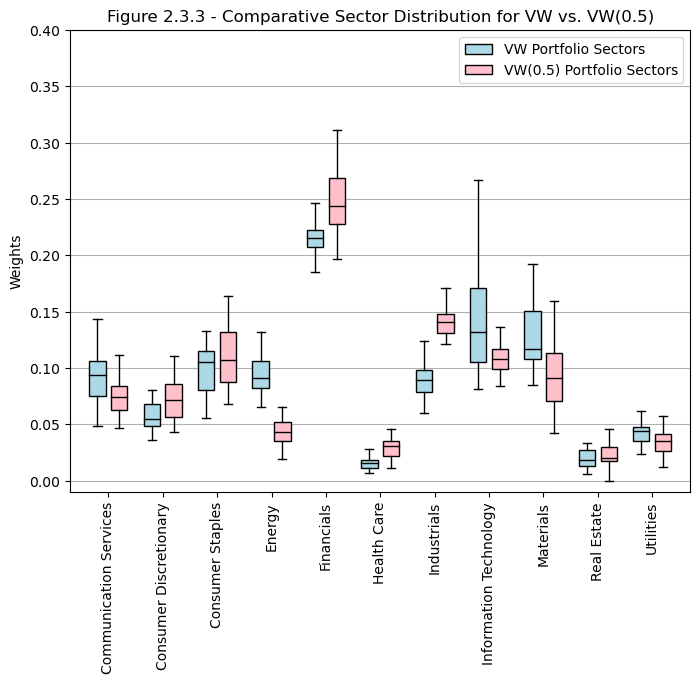

In [151]:
portfolio_weights_sap = pd.read_csv(savePaths['BP']['weights'], index_col=0, parse_dates=True)
static_info_sap = staticData.set_index('ISIN').loc[portfolio_weights_sap.columns]
merged_data_sap = portfolio_weights_sap.T.join(static_info_sap, how='left')
sector_weights_sap = merged_data_sap.groupby('GICSSectorName').sum(numeric_only=True).T

portfolio_weights_sap_50R = pd.read_csv(savePaths['BP_50R']['weights'], index_col=0, parse_dates=True)
static_info_sap_50R = staticData.set_index('ISIN').loc[portfolio_weights_sap_50R.columns]
merged_data_sap_50R = portfolio_weights_sap_50R.T.join(static_info_sap_50R, how='left')
sector_weights_sap_50R = merged_data_sap_50R.groupby('GICSSectorName').sum(numeric_only=True).T

common_sectors = sector_weights_sap.columns.intersection(sector_weights_sap_50R.columns)
data_group1 = sector_weights_sap[common_sectors]
data_group2 = sector_weights_sap_50R[common_sectors]

data_groups = [data_group1.values, data_group2.values]
labels = common_sectors.tolist()

# matplotlib.rcParams["figure.dpi"] = 300
fig, ax = plt.subplots(figsize=(8, 6))
positions1 = [x - 0.2 for x in range(len(labels))]
positions2 = [x + 0.2 for x in range(len(labels))]


bp1 = ax.boxplot(data_groups[0], positions=positions1, widths=0.3, patch_artist=True, boxprops=dict(facecolor='lightblue'), showfliers=False, medianprops=dict(color='black'))
bp2 = ax.boxplot(data_groups[1], positions=positions2, widths=0.3, patch_artist=True, boxprops=dict(facecolor='pink'), showfliers=False, medianprops=dict(color='black'))

ax.set_xticks(range(len(labels)))
ax.set_xticklabels(labels, rotation=90)
ax.set_title('Figure 2.3.3 - Comparative Sector Distribution for VW vs. VW(0.5)')
# ax.set_xlabel('Sectors')
ax.set_ylabel('Weights')
ax.grid(axis='y')
ax.legend([bp1["boxes"][0], bp2["boxes"][0]], ['VW Portfolio Sectors', 'VW(0.5) Portfolio Sectors'], loc='upper right')
ax.set_ylim(-0.01, 0.4)
plt.show()

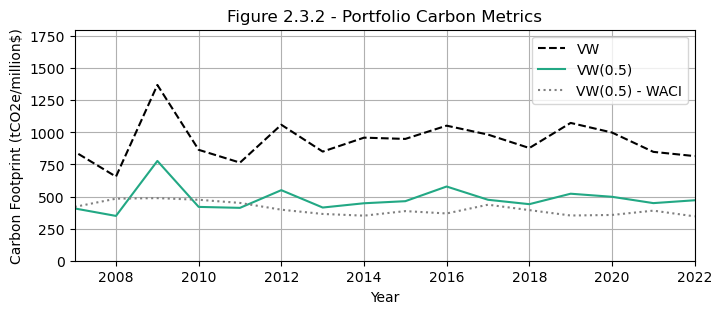

In [152]:
BP_CF = pd.read_csv(savePaths['BP']['CF'], index_col=0, header=None, skiprows=1, parse_dates=True)
BP_50R_CF = pd.read_csv(savePaths['BP_50R']['CF'], index_col=0, header=None, skiprows=1, parse_dates=True)
BP_50R_WACI = pd.read_csv(savePaths['BP_50R']['WACI'], index_col=0, header=None, skiprows=1, parse_dates=True)

# matplotlib.rcParams["figure.dpi"] = 300
plt.figure(figsize=(8, 3))
colors = cm.viridis_r([0.4, 0.6, 0.8])
plt.gca().set_prop_cycle('color', colors)

plt.plot(BP_CF, label='VW', color='black', linestyle='--')
plt.plot(BP_50R_CF, label='VW(0.5)')
plt.plot(BP_50R_WACI, label='VW(0.5) - WACI', color='grey', alpha=1, linestyle=':')

plt.title('Figure 2.3.2 - Portfolio Carbon Metrics')
plt.xlabel('Year')
plt.ylabel('Carbon Footprint (tCO2e/million$)')
plt.legend(loc='upper right')
plt.grid(True)
plt.ylim(0, 1800)
plt.xlim(pd.Timestamp('2007-01-01'), pd.Timestamp('2022-01-01'))
plt.show()

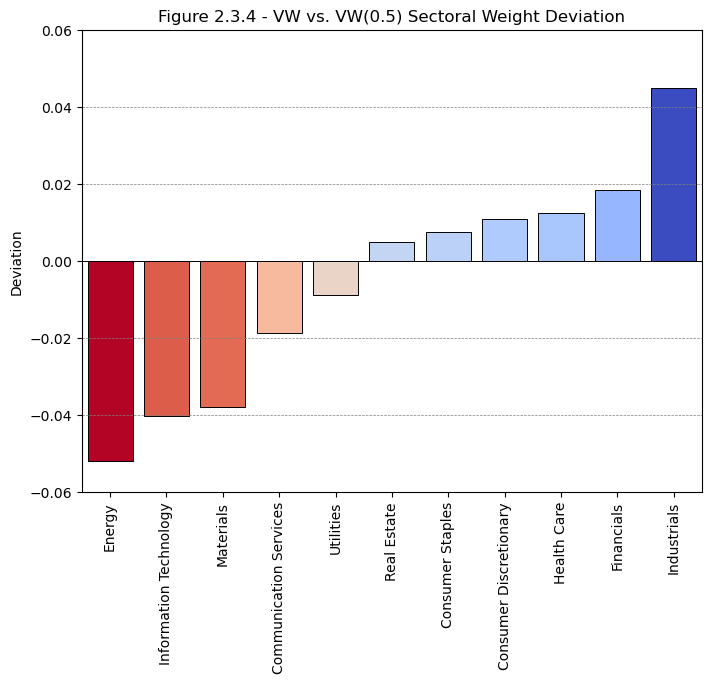

In [153]:
from matplotlib.colors import LinearSegmentedColormap, Normalize

portfolio_weights_1 = pd.read_csv(savePaths['BP']['weights'], index_col=0, parse_dates=True)
portfolio_weights_2 = pd.read_csv(savePaths['BP_50R']['weights'], index_col=0, parse_dates=True)
static_info = staticData.set_index('ISIN')
static_info_1 = static_info.loc[portfolio_weights_1.columns]
merged_data_1 = portfolio_weights_1.T.join(static_info, how='left')
sector_weights_1 = merged_data_1.groupby(['GICSSectorName']).sum(numeric_only=True).T
mean_weights_1 = sector_weights_1.mean()

static_info_2 = static_info.loc[portfolio_weights_2.columns]
merged_data_2 = portfolio_weights_2.T.join(static_info, how='left')
sector_weights_2 = merged_data_2.groupby(['GICSSectorName']).sum(numeric_only=True).T
mean_weights_2 = sector_weights_2.mean()

weight_differences = (mean_weights_2 - mean_weights_1).sort_values(ascending=True)

norm = plt.Normalize(weight_differences.min(), weight_differences.max())
colors = cm.coolwarm_r(norm(weight_differences.values))

# matplotlib.rcParams["figure.dpi"] = 300
plt.figure(figsize=(8, 6))
plt.bar(weight_differences.index, weight_differences, color=colors, edgecolor='k', linewidth=0.7)   
plt.ylabel('Deviation')
plt.title('Figure 2.3.4 - VW vs. VW(0.5) Sectoral Weight Deviation')
plt.grid(False, axis='x')
plt.grid(True, axis='y', linestyle='--', linewidth=0.5, color='gray')
plt.xticks(rotation=90)
plt.hlines(0, -2, 12, color='black', linestyle='-', linewidth=0.7)
plt.xlim(-0.5, 10.5)
plt.ylim(-0.06, 0.06)

plt.show()

sorted_columns = weight_differences.sort_values(ascending=True).index

2.4 - Tradeoffs Between SAP, BP and their respective 50% reduction portfolios

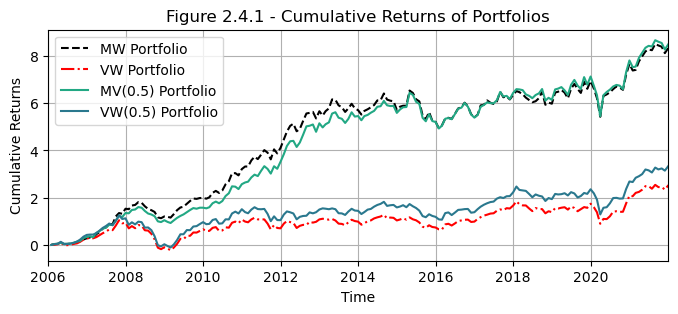

In [154]:
BP_50R = pd.read_csv(savePaths['BP_50R']['returns'], index_col=0, header=None, skiprows=1, parse_dates=True)
BP = pd.read_csv(savePaths['BP']['returns'], index_col=0, header=None, skiprows=1, parse_dates=True)
BP = BP[BP.index.year > 2005]
SAP = pd.read_csv(savePaths['SAP']['returns'], index_col=0, header=None, skiprows=1, parse_dates=True)
SAP_50R = pd.read_csv(savePaths['SAP_50R']['returns'], index_col=0, header=None, skiprows=1, parse_dates=True)

BP_50R_cum = (BP_50R + 1).cumprod() - 1
BP_cum = (BP + 1).cumprod() - 1
SAP_cum = (SAP + 1).cumprod() - 1
SAP_50R_cum = (SAP_50R + 1).cumprod() - 1

BP_50R_cum = BP_50R_cum - BP_50R_cum.iloc[0]
BP_cum = BP_cum - BP_cum.iloc[0]
SAP_cum = SAP_cum - SAP_cum.iloc[0]
SAP_50R_cum = SAP_50R_cum - SAP_50R_cum.iloc[0]

# matplotlib.rcParams["figure.dpi"] = 300
plt.figure(figsize=(8, 3))
colors = cm.viridis_r([0.4, 0.6, 0.8])
plt.gca().set_prop_cycle('color', colors)

plt.plot(SAP_cum, label='MW Portfolio', color='black', linestyle='--')
plt.plot(BP_cum, label='VW Portfolio', color='red', linestyle='-.')
plt.plot(SAP_50R_cum, label='MV(0.5) Portfolio', linestyle='-')
plt.plot(BP_50R_cum, label='VW(0.5) Portfolio', linestyle='-')

plt.xlabel('Time')
plt.ylabel('Cumulative Returns')
plt.title('Figure 2.4.1 - Cumulative Returns of Portfolios')
plt.legend()
plt.grid(True)
plt.xlim(pd.Timestamp('2006-01-01'), pd.Timestamp('2021-12-31'))

plt.show()

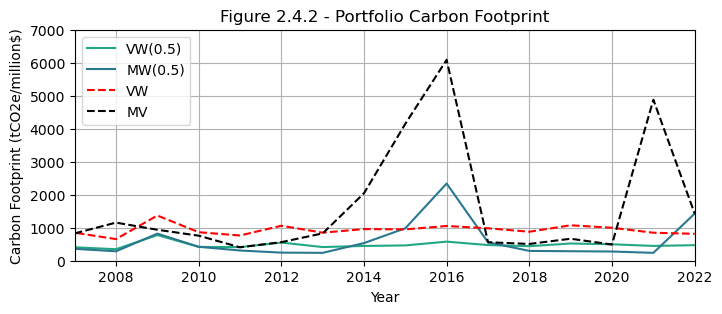

In [155]:
BP_CF = pd.read_csv(savePaths['BP']['CF'], index_col=0, header=None, skiprows=1, parse_dates=True)
SAP_CF = pd.read_csv(savePaths['SAP']['CF'], index_col=0, header=None, skiprows=1, parse_dates=True)
BP_50R_CF = pd.read_csv(savePaths['BP_50R']['CF'], index_col=0, header=None, skiprows=1, parse_dates=True)
SAP_50R_CF = pd.read_csv(savePaths['SAP_50R']['CF'], index_col=0, header=None, skiprows=1, parse_dates=True)


# matplotlib.rcParams["figure.dpi"] = 300
plt.figure(figsize=(8, 3))
colors = cm.viridis_r([0.4, 0.6, 0.8])
plt.gca().set_prop_cycle('color', colors)

plt.plot(BP_50R_CF, label='VW(0.5)', alpha=1,)
plt.plot(SAP_50R_CF, label='MW(0.5)', alpha=1,)
plt.plot(BP_CF, label='VW', color='red', linestyle='--')
plt.plot(SAP_CF, label='MV', color='black', linestyle='--')

plt.title('Figure 2.4.2 - Portfolio Carbon Footprint')
plt.xlabel('Year')
plt.ylabel('Carbon Footprint (tCO2e/million$)')
plt.legend()
plt.grid(True)
plt.xlim(pd.Timestamp('2007-01-01'), pd.Timestamp('2022-01-01'))
plt.ylim(0, 7000)
plt.show()

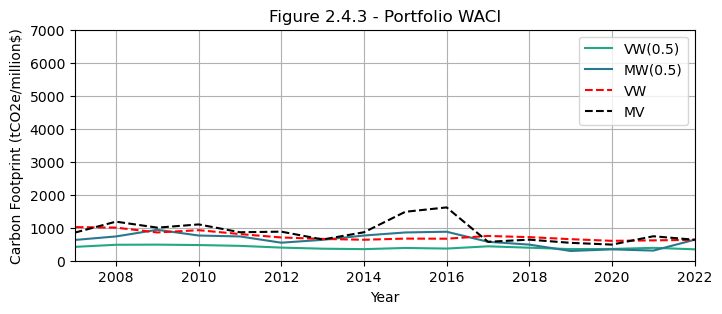

In [156]:
BP_WACI = pd.read_csv(savePaths['BP']['WACI'], index_col=0, header=None, skiprows=1, parse_dates=True)
SAP_WACI = pd.read_csv(savePaths['SAP']['WACI'], index_col=0, header=None, skiprows=1, parse_dates=True)
BP_50R_WACI = pd.read_csv(savePaths['BP_50R']['WACI'], index_col=0, header=None, skiprows=1, parse_dates=True)
SAP_50R_WACI = pd.read_csv(savePaths['SAP_50R']['WACI'], index_col=0, header=None, skiprows=1, parse_dates=True)


# matplotlib.rcParams["figure.dpi"] = 300
plt.figure(figsize=(8, 3))
colors = cm.viridis_r([0.4, 0.6, 0.8])
plt.gca().set_prop_cycle('color', colors)

plt.plot(BP_50R_WACI, label='VW(0.5)', alpha=1,)
plt.plot(SAP_50R_WACI, label='MW(0.5)', alpha=1,)
plt.plot(BP_WACI, label='VW', color='red', linestyle='--')
plt.plot(SAP_WACI, label='MV', color='black', linestyle='--')

plt.title('Figure 2.4.3 - Portfolio WACI')
plt.xlabel('Year')
plt.ylabel('Carbon Footprint (tCO2e/million$)')
plt.legend()
plt.grid(True)
plt.xlim(pd.Timestamp('2007-01-01'), pd.Timestamp('2022-01-01'))
plt.ylim(0, 7000)
plt.show()

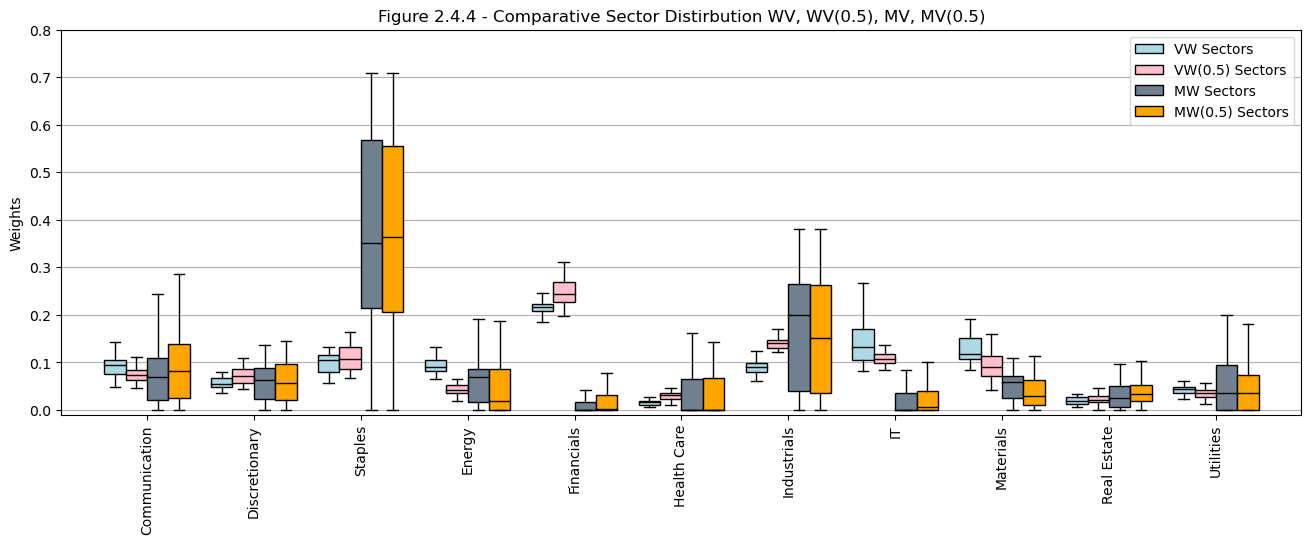

In [157]:
portfolio_weights_bp = pd.read_csv(savePaths['BP']['weights'], index_col=0, parse_dates=True)
static_info_sap = staticData.set_index('ISIN').loc[portfolio_weights_bp.columns]
merged_data_sap = portfolio_weights_bp.T.join(static_info_sap, how='left')
sector_weights_bp = merged_data_sap.groupby('GICSSectorName').sum(numeric_only=True).T

portfolio_weights_bp_50R = pd.read_csv(savePaths['BP_50R']['weights'], index_col=0, parse_dates=True)
static_info_sap_50R = staticData.set_index('ISIN').loc[portfolio_weights_bp_50R.columns]
merged_data_sap_50R = portfolio_weights_bp_50R.T.join(static_info_sap_50R, how='left')
sector_weights_bp_50R = merged_data_sap_50R.groupby('GICSSectorName').sum(numeric_only=True).T

portfolio_weights_sap = pd.read_csv(savePaths['SAP']['weights'], index_col=0, parse_dates=True)
static_info_sap = staticData.set_index('ISIN').loc[portfolio_weights_sap.columns]
merged_data_sap = portfolio_weights_sap.T.join(static_info_sap, how='left')
sector_weights_sap = merged_data_sap.groupby('GICSSectorName').sum(numeric_only=True).T

portfolio_weights_sap_50R = pd.read_csv(savePaths['SAP_50R']['weights'], index_col=0, parse_dates=True)
static_info_sap_50R = staticData.set_index('ISIN').loc[portfolio_weights_sap_50R.columns]
merged_data_sap_50R = portfolio_weights_sap_50R.T.join(static_info_sap_50R, how='left')
sector_weights_sap_50R = merged_data_sap_50R.groupby('GICSSectorName').sum(numeric_only=True).T

common_sectors = sector_weights_bp.columns.intersection(sector_weights_bp_50R.columns)
data_group1 = sector_weights_bp[common_sectors]
data_group2 = sector_weights_bp_50R[common_sectors]
data_group3 = sector_weights_sap[common_sectors]
data_group4 = sector_weights_sap_50R[common_sectors]

alternative_labels = {'Communication Services': 'Communication', 
                      'Consumer Discretionary': 'Discretionary', 
                      'Consumer Staples': 'Staples', 
                      'Information Technology': 'IT'}

data_group1.rename(columns=alternative_labels, inplace=True)
data_group2.rename(columns=alternative_labels, inplace=True)
data_group3.rename(columns=alternative_labels, inplace=True)
data_group4.rename(columns=alternative_labels, inplace=True)

data_groups = [data_group1.values, data_group2.values, data_group3.values, data_group4.values]
labels = [alternative_labels.get(label, label) for label in common_sectors]

# matplotlib.rcParams["figure.dpi"] = 300
fig, ax = plt.subplots(figsize=(16, 5))
positions1 = [x - 0.3 for x in range(len(labels))]
positions2 = [x - 0.1 for x in range(len(labels))]
positions3 = [x + 0.1 for x in range(len(labels))]
positions4 = [x + 0.3 for x in range(len(labels))]


bp1 = ax.boxplot(data_groups[0], positions=positions1, widths=0.2, patch_artist=True, boxprops=dict(facecolor='lightblue'), showfliers=False, medianprops=dict(color='black'))
bp2 = ax.boxplot(data_groups[1], positions=positions2, widths=0.2, patch_artist=True, boxprops=dict(facecolor='pink'), showfliers=False, medianprops=dict(color='black'))
bp3 = ax.boxplot(data_groups[2], positions=positions3, widths=0.2, patch_artist=True, boxprops=dict(facecolor='slategrey'), showfliers=False, medianprops=dict(color='black'))
bp4 = ax.boxplot(data_groups[3], positions=positions4, widths=0.2, patch_artist=True, boxprops=dict(facecolor='orange'), showfliers=False, medianprops=dict(color='black'))

ax.set_xticks(range(len(labels)))
ax.set_xticklabels(labels, rotation=90)
ax.set_title('Figure 2.4.4 - Comparative Sector Distirbution WV, WV(0.5), MV, MV(0.5)')
# ax.set_xlabel('Sectors')
ax.set_ylabel('Weights')
ax.grid(axis='y')
ax.legend([bp1["boxes"][0], bp2["boxes"][0], bp3["boxes"][0], bp4["boxes"][0]], 
          ['VW Sectors', 
           'VW(0.5) Sectors', 
           'MW Sectors', 
           'MW(0.5) Sectors'], 
           loc='upper right')
ax.set_ylim(-0.01, 0.8)
plt.show()

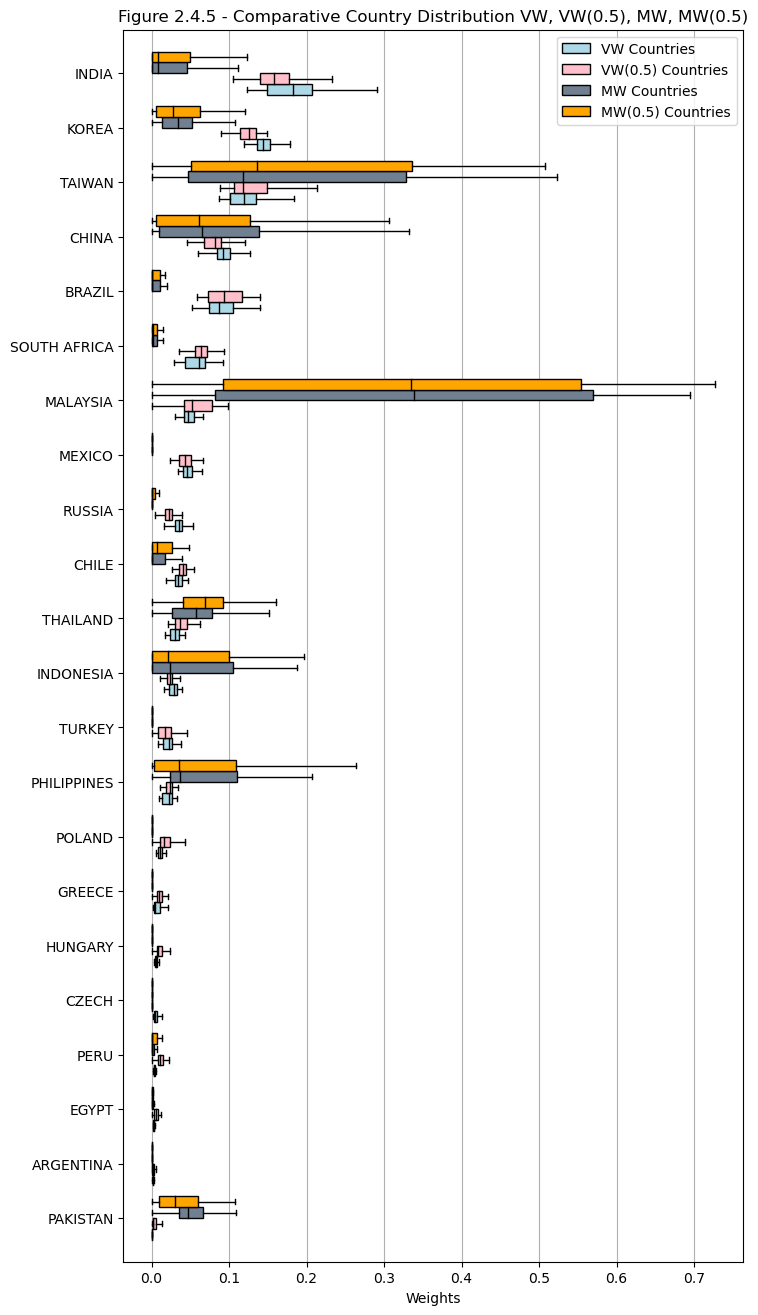

In [158]:
portfolio_weights_bp = pd.read_csv(savePaths['BP']['weights'], index_col=0, parse_dates=True)
static_info_sap = staticData.set_index('ISIN').loc[portfolio_weights_bp.columns]
merged_data_sap = portfolio_weights_bp.T.join(static_info_sap, how='left')
country_weights_bp = merged_data_sap.groupby('Country').sum(numeric_only=True).T

portfolio_weights_bp_50R = pd.read_csv(savePaths['BP_50R']['weights'], index_col=0, parse_dates=True)
static_info_sap_50R = staticData.set_index('ISIN').loc[portfolio_weights_bp_50R.columns]
merged_data_sap_50R = portfolio_weights_bp_50R.T.join(static_info_sap_50R, how='left')
country_weights_bp_50R = merged_data_sap_50R.groupby('Country').sum(numeric_only=True).T

portfolio_weights_sap = pd.read_csv(savePaths['SAP']['weights'], index_col=0, parse_dates=True)
static_info_sap = staticData.set_index('ISIN').loc[portfolio_weights_sap.columns]
merged_data_sap = portfolio_weights_sap.T.join(static_info_sap, how='left')
country_weights_sap = merged_data_sap.groupby('Country').sum(numeric_only=True).T

portfolio_weights_sap_50R = pd.read_csv(savePaths['SAP_50R']['weights'], index_col=0, parse_dates=True)
static_info_sap_50R = staticData.set_index('ISIN').loc[portfolio_weights_sap_50R.columns]
merged_data_sap_50R = portfolio_weights_sap_50R.T.join(static_info_sap_50R, how='left')
country_weights_sap_50R = merged_data_sap_50R.groupby('Country').sum(numeric_only=True).T

common_countries = country_weights_bp.columns.intersection(country_weights_bp_50R.columns)
data_group1 = country_weights_bp[common_countries]
data_group2 = country_weights_bp_50R[common_countries]
data_group3 = country_weights_sap[common_countries]
data_group4 = country_weights_sap_50R[common_countries]

alternative_labels = {'KOREA, REPUBLIC OF': 'KOREA', 
                      'TAIWAN, PROVINCE OF CHINA': 'TAIWAN', 
                      'RUSSIAN FEDERATION': 'RUSSIA', 
                      'CZECH REPUBLIC': 'CZECH'}

data_group1.rename(columns=alternative_labels, inplace=True)
data_group2.rename(columns=alternative_labels, inplace=True)
data_group3.rename(columns=alternative_labels, inplace=True)
data_group4.rename(columns=alternative_labels, inplace=True)

# Calculate the sum of weights for each country and sort in descending order
total_weights = data_group1.sum(axis=0)
sorted_indices = total_weights.sort_values(ascending=True).index

# Reorder data groups and labels based on the sorted order
data_group1 = data_group1[sorted_indices]
data_group2 = data_group2[sorted_indices]
data_group3 = data_group3[sorted_indices]
data_group4 = data_group4[sorted_indices]
labels = sorted_indices.tolist()


data_groups = [data_group1.values, data_group2.values, data_group3.values, data_group4.values]

# matplotlib.rcParams["figure.dpi"] = 300
fig, ax = plt.subplots(figsize=(8, 16))
positions1 = [x - 0.3 for x in range(len(labels))]
positions2 = [x - 0.1 for x in range(len(labels))]
positions3 = [x + 0.1 for x in range(len(labels))]
positions4 = [x + 0.3 for x in range(len(labels))]

bp1 = ax.boxplot(data_groups[0], positions=positions1, widths=0.2, vert=False, patch_artist=True, boxprops=dict(facecolor='lightblue'), showfliers=False, medianprops=dict(color='black'))
bp2 = ax.boxplot(data_groups[1], positions=positions2, widths=0.2, vert=False, patch_artist=True, boxprops=dict(facecolor='pink'), showfliers=False, medianprops=dict(color='black'))
bp3 = ax.boxplot(data_groups[2], positions=positions3, widths=0.2, vert=False, patch_artist=True, boxprops=dict(facecolor='slategrey'), showfliers=False, medianprops=dict(color='black'))
bp4 = ax.boxplot(data_groups[3], positions=positions4, widths=0.2, vert=False, patch_artist=True, boxprops=dict(facecolor='orange'), showfliers=False, medianprops=dict(color='black'))

ax.set_yticks(range(len(labels)))
ax.set_yticklabels(labels)
ax.set_title('Figure 2.4.5 - Comparative Country Distribution VW, VW(0.5), MW, MW(0.5)')
# ax.set_ylabel('Countries')
ax.set_xlabel('Weights')
ax.grid(axis='x')
ax.legend([bp1["boxes"][0], bp2["boxes"][0], bp3["boxes"][0], bp4["boxes"][0]], 
          ['VW Countries', 
           'VW(0.5) Countries', 
           'MW Countries', 
           'MW(0.5) Countries'], 
           loc='upper right')
plt.show()

3.1 - Benchmark Portfolio - Net Zero

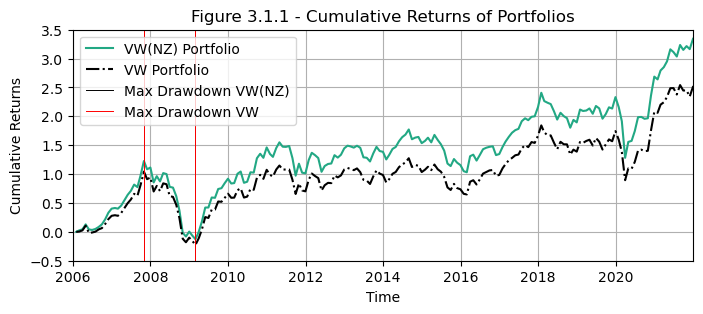

Annualized Mean Return of BP_TENZR: 0.1216
Annualized Volatility of BP_TENZR: 0.2073
Sharpe Ratio of BP_TENZR: 0.5314
Minimum Return of BP_TENZR: -0.2618
Maximum Return of BP_TENZR: 0.1882


Annualized Mean Return of BP: 0.0958
Annualized Volatility of BP: 0.2074
Sharpe Ratio of BP: 0.4067
Minimum Return of BP: -0.2662
Maximum Return of BP: 0.1853


Maximum Drawdown - BP_TENZR: 1.3545
Date of Maximum Drawdown - BP_TENZR: 2009-02-28 00:00:00
Date before Maximum Drawdown - BP_TENZR: 2007-10-31 00:00:00


Maximum Drawdown - BP: 1.2697
Date of Maximum Drawdown - BP: 2009-02-28 00:00:00
Date before Maximum Drawdown - BP: 2007-10-31 00:00:00


In [159]:
BP_TENZR = pd.read_csv(savePaths['BP_TENZR']['returns'], index_col=0, header=None, skiprows=1, parse_dates=True)
BP = pd.read_csv(savePaths['BP']['returns'], index_col=0, header=None, skiprows=1, parse_dates=True)
BP = BP[BP.index.year > 2005]

BP_TENZR_cum = (BP_TENZR + 1).cumprod() - 1
BP_cum = (BP + 1).cumprod() - 1

BP_TENZR_cum = BP_TENZR_cum - BP_TENZR_cum.iloc[0]
BP_cum = BP_cum - BP_cum.iloc[0]

drawdownBP_50R, MDDmonthlyBP_50R = MDD(BP_TENZR_cum)
max_DD_date_BP_50R = drawdownBP_50R.idxmax()
peak_before_DD_BP_50R = BP_TENZR_cum.loc[:max_DD_date_BP_50R].idxmax()

drawdownBP, MDDmonthlyBP = MDD(BP_cum)
max_DD_date_BP = drawdownBP.idxmax()
peak_before_DD_BP = BP_cum.loc[:max_DD_date_BP].idxmax()

# matplotlib.rcParams["figure.dpi"] = 300
plt.figure(figsize=(8, 3))
colors = cm.viridis_r([0.4, 0.6, 0.8])
plt.gca().set_prop_cycle('color', colors)

plt.plot(BP_TENZR_cum, label='VW(NZ) Portfolio', linestyle='-')
plt.plot(BP_cum, label='VW Portfolio', color='black', linestyle='-.')

plt.axvline(x=max_DD_date_BP_50R, color='black', linestyle='-', label='Max Drawdown VW(NZ)', linewidth=0.7)
plt.axvline(x=peak_before_DD_BP_50R, color='black', linestyle='-', linewidth=0.7)
plt.axvline(x=max_DD_date_BP, color='red', linestyle='-', label='Max Drawdown VW', linewidth=0.7)
plt.axvline(x=peak_before_DD_BP, color='red', linestyle='-', linewidth=0.7)

plt.xlabel('Time')
plt.ylabel('Cumulative Returns')
plt.title('Figure 3.1.1 - Cumulative Returns of Portfolios')
plt.legend(loc='upper left')
plt.grid(True)
plt.ylim(-0.5, 3.5)
plt.xlim(pd.Timestamp('2006-01-01'), pd.Timestamp('2021-12-31'))

plt.show()

stats_BP_50R = portfolio_evaluation(BP_TENZR, rfRate)
stats_BP = portfolio_evaluation(BP, rfRate)

n = 4  # Rounding

print(f"Annualized Mean Return of BP_TENZR: {stats_BP_50R['mu']:.{n}f}")
print(f"Annualized Volatility of BP_TENZR: {stats_BP_50R['std']:.{n}f}")
print(f"Sharpe Ratio of BP_TENZR: {stats_BP_50R['SR']:.{n}f}")
print(f"Minimum Return of BP_TENZR: {stats_BP_50R['min']:.{n}f}")
print(f"Maximum Return of BP_TENZR: {stats_BP_50R['max']:.{n}f}")
print('\n')

print(f"Annualized Mean Return of BP: {stats_BP['mu']:.{n}f}")
print(f"Annualized Volatility of BP: {stats_BP['std']:.{n}f}")
print(f"Sharpe Ratio of BP: {stats_BP['SR']:.{n}f}")
print(f"Minimum Return of BP: {stats_BP['min']:.{n}f}")
print(f"Maximum Return of BP: {stats_BP['max']:.{n}f}")
print('\n')

print(f'Maximum Drawdown - BP_TENZR: {MDDmonthlyBP_50R:.{n}f}')
print(f'Date of Maximum Drawdown - BP_TENZR: {max_DD_date_BP_50R}')
print(f'Date before Maximum Drawdown - BP_TENZR: {peak_before_DD_BP_50R.iloc[-1]}')
print('\n')

print(f'Maximum Drawdown - BP: {MDDmonthlyBP:.{n}f}')
print(f'Date of Maximum Drawdown - BP: {max_DD_date_BP}')
print(f'Date before Maximum Drawdown - BP: {peak_before_DD_BP.iloc[-1]}')


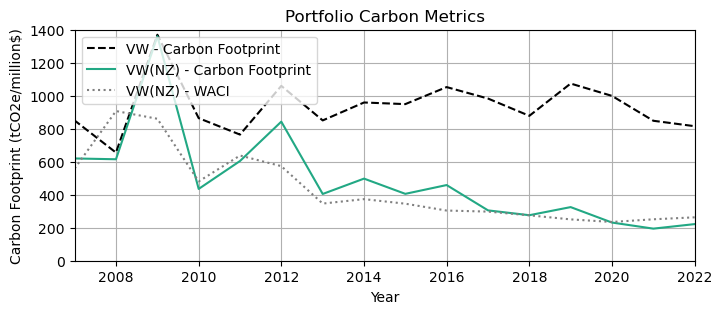

In [160]:
BP_CF = pd.read_csv(savePaths['BP']['CF'], index_col=0, header=None, skiprows=1, parse_dates=True)
BP_TENZR_CF = pd.read_csv(savePaths['BP_TENZR']['CF'], index_col=0, header=None, skiprows=1, parse_dates=True)
BP_TENZR_WACI = pd.read_csv(savePaths['BP_TENZR']['WACI'], index_col=0, header=None, skiprows=1, parse_dates=True)


# matplotlib.rcParams["figure.dpi"] = 300
plt.figure(figsize=(8, 3))
colors = cm.viridis_r([0.4, 0.6, 0.8])
plt.gca().set_prop_cycle('color', colors)

plt.plot(BP_CF, label='VW - Carbon Footprint', color='black', linestyle='--')
plt.plot(BP_TENZR_CF, label='VW(NZ) - Carbon Footprint')
plt.plot(BP_TENZR_WACI, label='VW(NZ) - WACI', color='grey', alpha=1, linestyle=':')

plt.title('Portfolio Carbon Metrics')
plt.xlabel('Year')
plt.ylabel('Carbon Footprint (tCO2e/million$)')
plt.legend()
plt.grid(True)
plt.xlim(pd.Timestamp('2007-01-01'), pd.Timestamp('2022-01-01'))
plt.ylim(0, 1400)
plt.show()

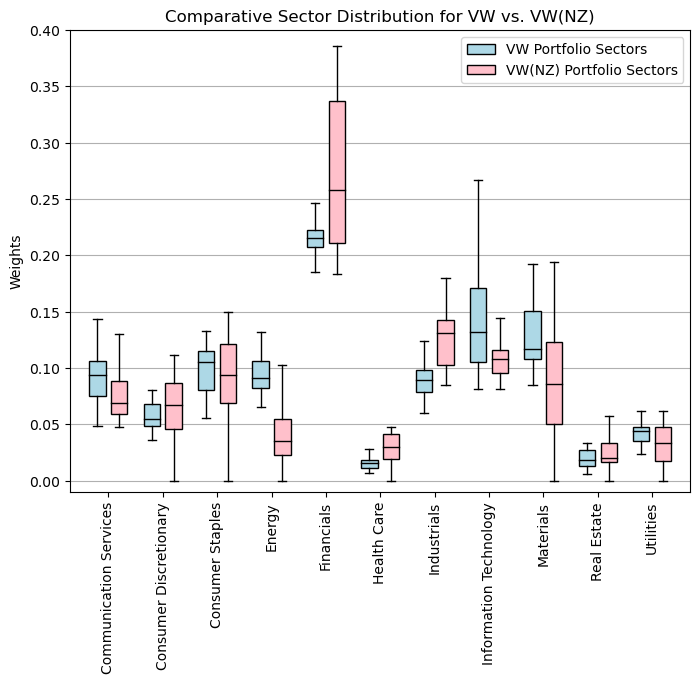

In [161]:
portfolio_weights_sap = pd.read_csv(savePaths['BP']['weights'], index_col=0, parse_dates=True)
static_info_sap = staticData.set_index('ISIN').loc[portfolio_weights_sap.columns]
merged_data_sap = portfolio_weights_sap.T.join(static_info_sap, how='left')
sector_weights_sap = merged_data_sap.groupby('GICSSectorName').sum(numeric_only=True).T

portfolio_weights_sap_50R = pd.read_csv(savePaths['BP_TENZR']['weights'], index_col=0, parse_dates=True)
static_info_sap_50R = staticData.set_index('ISIN').loc[portfolio_weights_sap_50R.columns]
merged_data_sap_50R = portfolio_weights_sap_50R.T.join(static_info_sap_50R, how='left')
sector_weights_sap_50R = merged_data_sap_50R.groupby('GICSSectorName').sum(numeric_only=True).T

common_sectors = sector_weights_sap.columns.intersection(sector_weights_sap_50R.columns)
data_group1 = sector_weights_sap[common_sectors]
data_group2 = sector_weights_sap_50R[common_sectors]

data_groups = [data_group1.values, data_group2.values]
labels = common_sectors.tolist()

# matplotlib.rcParams["figure.dpi"] = 300
fig, ax = plt.subplots(figsize=(8, 6))
positions1 = [x - 0.2 for x in range(len(labels))]
positions2 = [x + 0.2 for x in range(len(labels))]


bp1 = ax.boxplot(data_groups[0], positions=positions1, widths=0.3, patch_artist=True, boxprops=dict(facecolor='lightblue'), showfliers=False, medianprops=dict(color='black'))
bp2 = ax.boxplot(data_groups[1], positions=positions2, widths=0.3, patch_artist=True, boxprops=dict(facecolor='pink'), showfliers=False, medianprops=dict(color='black'))

ax.set_xticks(range(len(labels)))
ax.set_xticklabels(labels, rotation=90)
ax.set_title('Comparative Sector Distribution for VW vs. VW(NZ)')
# ax.set_xlabel('Sectors')
ax.set_ylabel('Weights')
ax.grid(axis='y')
ax.legend([bp1["boxes"][0], bp2["boxes"][0]], ['VW Portfolio Sectors', 'VW(NZ) Portfolio Sectors'], loc='upper right')
ax.set_ylim(-0.01, 0.4)
plt.show()

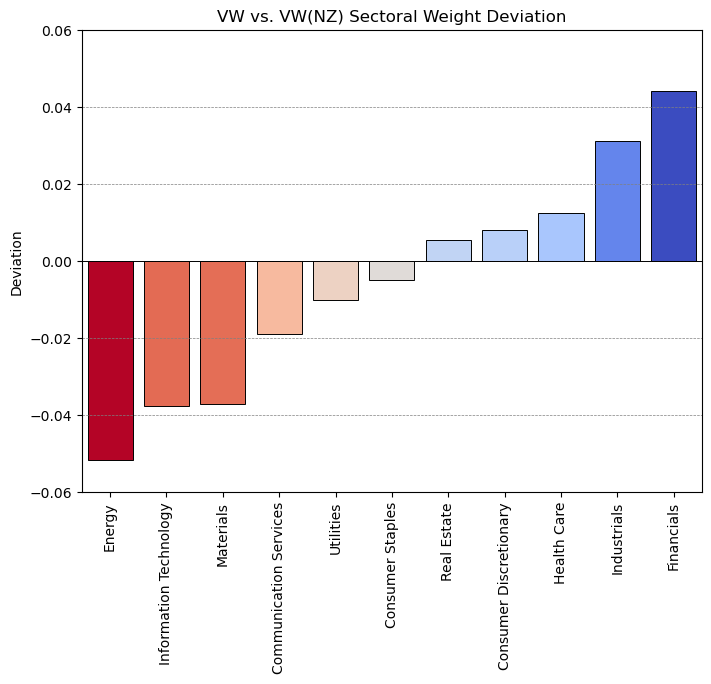

In [162]:
portfolio_weights_1 = pd.read_csv(savePaths['BP']['weights'], index_col=0, parse_dates=True)
portfolio_weights_2 = pd.read_csv(savePaths['BP_TENZR']['weights'], index_col=0, parse_dates=True)
static_info = staticData.set_index('ISIN')
static_info_1 = static_info.loc[portfolio_weights_1.columns]
merged_data_1 = portfolio_weights_1.T.join(static_info, how='left')
sector_weights_1 = merged_data_1.groupby(['GICSSectorName']).sum(numeric_only=True).T
mean_weights_1 = sector_weights_1.mean()

static_info_2 = static_info.loc[portfolio_weights_2.columns]
merged_data_2 = portfolio_weights_2.T.join(static_info, how='left')
sector_weights_2 = merged_data_2.groupby(['GICSSectorName']).sum(numeric_only=True).T
mean_weights_2 = sector_weights_2.mean()

weight_differences = (mean_weights_2 - mean_weights_1).sort_values(ascending=True)

norm = plt.Normalize(weight_differences.min(), weight_differences.max())
colors = cm.coolwarm_r(norm(weight_differences.values))

# matplotlib.rcParams["figure.dpi"] = 300
plt.figure(figsize=(8, 6))
plt.bar(weight_differences.index, weight_differences, color=colors, edgecolor='k', linewidth=0.7)   
plt.ylabel('Deviation')
plt.title('VW vs. VW(NZ) Sectoral Weight Deviation')
plt.grid(False, axis='x')
plt.grid(True, axis='y', linestyle='--', linewidth=0.5, color='gray')
plt.xticks(rotation=90)
plt.hlines(0, -2, 12, color='black', linestyle='-', linewidth=0.7)
plt.xlim(-0.5, 10.5)
plt.ylim(-0.06, 0.06)

plt.show()

sorted_columns = weight_differences.sort_values(ascending=True).index

3.2 - Comparison of the Benchmark decarbonization strategies

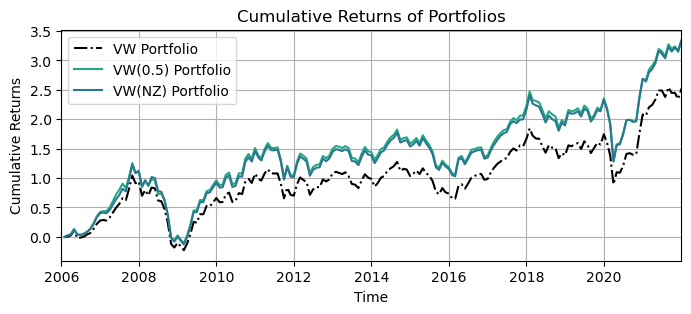

In [163]:
SAP = pd.read_csv(savePaths['SAP']['returns'], index_col=0, header=None, skiprows=1, parse_dates=True)
SAP_50R = pd.read_csv(savePaths['SAP_50R']['returns'], index_col=0, header=None, skiprows=1, parse_dates=True)
BP = pd.read_csv(savePaths['BP']['returns'], index_col=0, header=None, skiprows=1, parse_dates=True)
BP_50R = pd.read_csv(savePaths['BP_50R']['returns'], index_col=0, header=None, skiprows=1, parse_dates=True)
BP_TENZR = pd.read_csv(savePaths['BP_TENZR']['returns'], index_col=0, header=None, skiprows=1, parse_dates=True)
BP = BP[BP.index.year > 2005]

SAP_cum = (SAP + 1).cumprod() - 1
SAP_50R_cum = (SAP_50R + 1).cumprod() - 1
BP_cum = (BP + 1).cumprod() - 1
BP_50R_cum = (BP_50R + 1).cumprod() - 1
BP_TENZR_cum = (BP_TENZR + 1).cumprod() - 1

SAP_cum = SAP_cum - SAP_cum.iloc[0]
SAP_50R_cum = SAP_50R_cum - SAP_50R_cum.iloc[0]
BP_cum = BP_cum - BP_cum.iloc[0]
BP_50R_cum = BP_50R_cum - BP_50R_cum.iloc[0]
BP_TENZR_cum = BP_TENZR_cum - BP_TENZR_cum.iloc[0]

# matplotlib.rcParams["figure.dpi"] = 300
plt.figure(figsize=(8, 3))
colors = cm.viridis_r([0.4, 0.6, 0.8])
plt.gca().set_prop_cycle('color', colors)

plt.plot(BP_cum, label='VW Portfolio', color='black', linestyle='-.')
plt.plot(BP_50R_cum, label='VW(0.5) Portfolio')
plt.plot(BP_TENZR_cum, label='VW(NZ) Portfolio')

plt.xlabel('Time')
plt.ylabel('Cumulative Returns')
plt.title('Cumulative Returns of Portfolios')
plt.legend()
plt.grid(True)
plt.xlim(pd.Timestamp('2006-01-01'), pd.Timestamp('2021-12-31'))

plt.show()

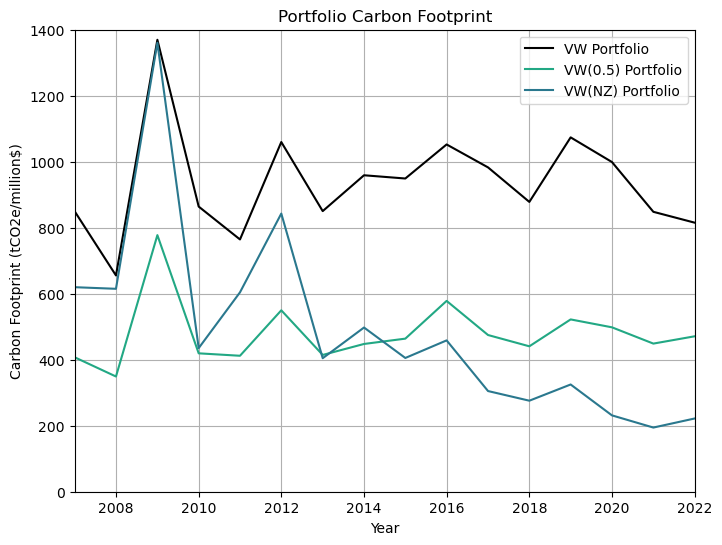

In [164]:
SAP_CF = pd.read_csv(savePaths['SAP']['CF'], index_col=0, header=None, skiprows=1, parse_dates=True)
SAP_WACI = pd.read_csv(savePaths['SAP']['WACI'], index_col=0, header=None, skiprows=1, parse_dates=True)
SAP_50R_CF = pd.read_csv(savePaths['SAP_50R']['CF'], index_col=0, header=None, skiprows=1, parse_dates=True)

# matplotlib.rcParams["figure.dpi"] = 300
plt.figure(figsize=(8, 6))
colors = cm.viridis_r([0.4, 0.6, 0.8])
plt.gca().set_prop_cycle('color', colors)

plt.plot(BP_CF, label='VW Portfolio', color='black')
plt.plot(BP_50R_CF, label='VW(0.5) Portfolio')
plt.plot(BP_TENZR_CF, label='VW(NZ) Portfolio')

plt.title('Portfolio Carbon Footprint')
plt.xlabel('Year')
plt.ylabel('Carbon Footprint (tCO2e/million$)')
plt.legend()
plt.grid(True)
plt.ylim(0, 1400)
plt.xlim(pd.Timestamp('2007-01-01'), pd.Timestamp('2022-01-01'))
plt.show()

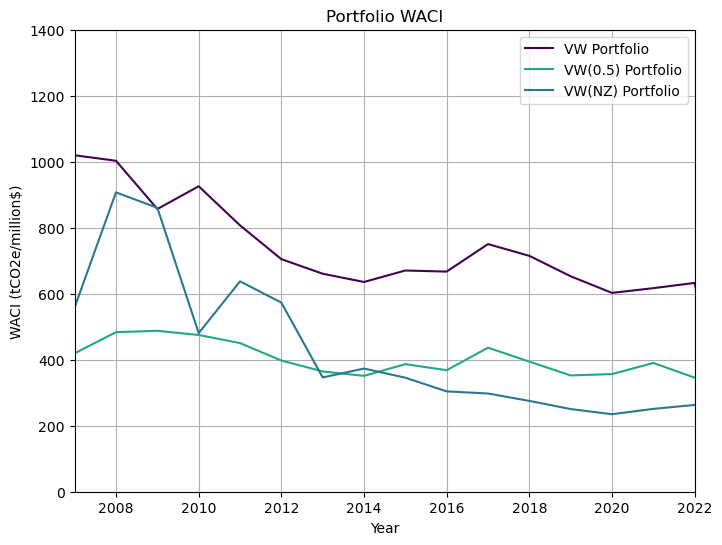

In [165]:
BP_WACI = pd.read_csv(savePaths['BP']['WACI'], index_col=0, header=None, skiprows=1, parse_dates=True)
BP_50R_WACI = pd.read_csv(savePaths['BP_50R']['WACI'], index_col=0, header=None, skiprows=1, parse_dates=True)
BP_TENZR_WACI = pd.read_csv(savePaths['BP_TENZR']['WACI'], index_col=0, header=None, skiprows=1, parse_dates=True)


# matplotlib.rcParams["figure.dpi"] = 300
plt.figure(figsize=(8, 6))
colors = cm.viridis_r([0.4, 0.6, 1])
plt.gca().set_prop_cycle('color', colors)

plt.plot(BP_WACI, label='VW Portfolio', color = colors[2])
plt.plot(BP_50R_WACI, label='VW(0.5) Portfolio')
plt.plot(BP_TENZR_WACI, label='VW(NZ) Portfolio')

plt.title('Portfolio WACI')
plt.xlabel('Year')
plt.ylabel('WACI (tCO2e/million$)')
plt.legend()
plt.grid(True)
plt.ylim(0, 1400)
plt.xlim(pd.Timestamp('2007-01-01'), pd.Timestamp('2022-01-01'))
plt.show()

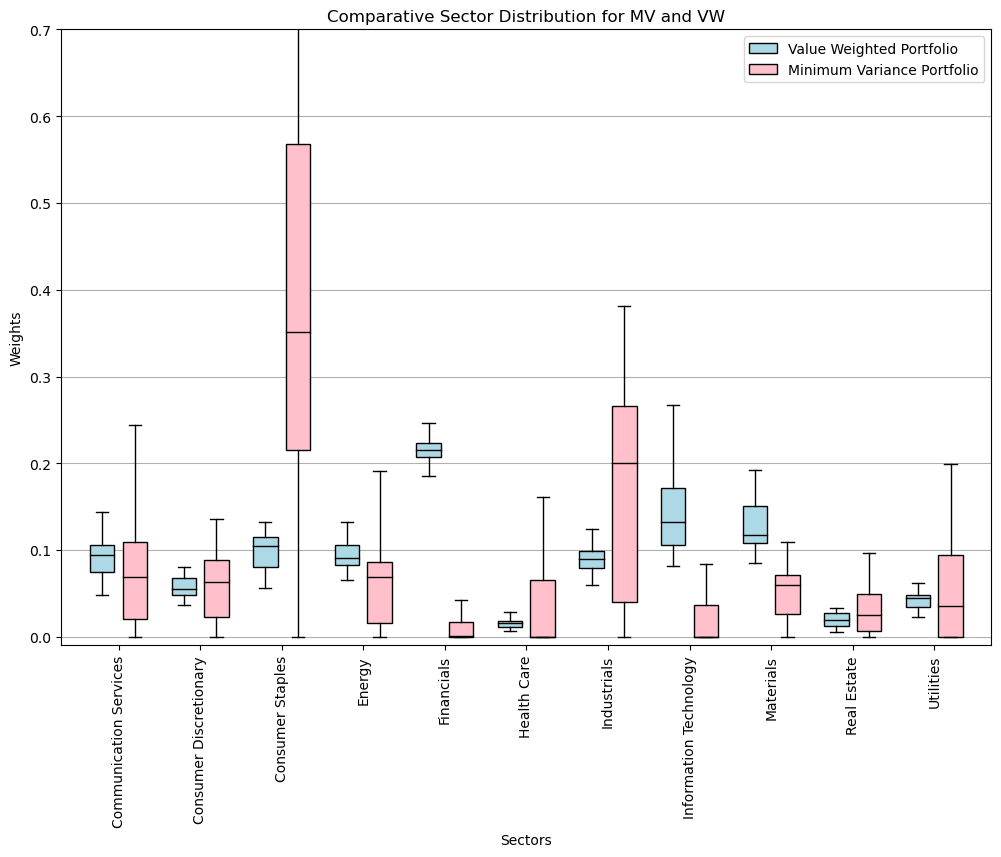

In [166]:
portfolio_weights_sap = pd.read_csv(savePaths['SAP']['weights'], index_col=0, parse_dates=True)
static_info_sap = staticData.set_index('ISIN').loc[portfolio_weights_sap.columns]
merged_data_sap = portfolio_weights_sap.T.join(static_info_sap, how='left')
sector_weights_sap = merged_data_sap.groupby('GICSSectorName').sum(numeric_only=True).T

# Read and process BP data
portfolio_weights_bp = pd.read_csv(savePaths['BP']['weights'], index_col=0, parse_dates=True)
static_info_bp = staticData.set_index('ISIN').loc[portfolio_weights_bp.columns]
merged_data_bp = portfolio_weights_bp.T.join(static_info_bp, how='left')
sector_weights_bp = merged_data_bp.groupby('GICSSectorName').sum(numeric_only=True).T

# Find common sectors and align them
common_sectors = sector_weights_sap.columns.intersection(sector_weights_bp.columns)
data_group1 = sector_weights_bp[common_sectors]
data_group2 = sector_weights_sap[common_sectors]

# Prepare the boxplot data
data_groups = [data_group1.values, data_group2.values]
labels = common_sectors.tolist()

# Create plot
fig, ax = plt.subplots(figsize=(12, 8))
positions1 = [x - 0.2 for x in range(len(labels))]
positions2 = [x + 0.2 for x in range(len(labels))]


bp1 = ax.boxplot(data_groups[0], positions=positions1, widths=0.3, patch_artist=True, boxprops=dict(facecolor='lightblue'), showfliers=False, medianprops=dict(color='black'))
bp2 = ax.boxplot(data_groups[1], positions=positions2, widths=0.3, patch_artist=True, boxprops=dict(facecolor='pink'), showfliers=False, medianprops=dict(color='black'))

ax.set_xticks(range(len(labels)))
ax.set_xticklabels(labels, rotation=90)
ax.set_title('Comparative Sector Distribution for MV and VW')
ax.set_xlabel('Sectors')
ax.set_ylabel('Weights')
ax.grid(axis='y')
ax.legend([bp1["boxes"][0], bp2["boxes"][0]], ['Value Weighted Portfolio', 'Minimum Variance Portfolio'], loc='upper right')
ax.set_ylim(-0.01, 0.7)
plt.show()

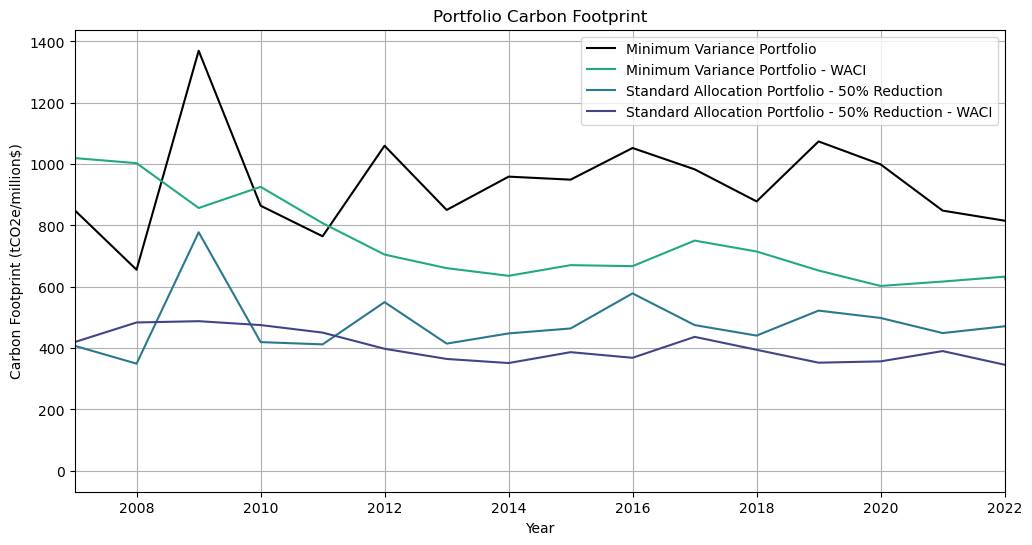

In [167]:
SAP_CF = pd.read_csv(savePaths['SAP']['CF'], index_col=0, header=None, skiprows=1, parse_dates=True)
SAP_WACI = pd.read_csv(savePaths['SAP']['WACI'], index_col=0, header=None, skiprows=1, parse_dates=True)
SAP_50R_CF = pd.read_csv(savePaths['SAP_50R']['CF'], index_col=0, header=None, skiprows=1, parse_dates=True)
SAP_50R_WACI = pd.read_csv(savePaths['SAP_50R']['WACI'], index_col=0, header=None, skiprows=1, parse_dates=True)
BP_50R_WACI = pd.read_csv(savePaths['BP_50R']['WACI'], index_col=0, header=None, skiprows=1, parse_dates=True)


plt.figure(figsize=(12, 6))
colors = cm.viridis_r([0.4, 0.6, 0.8])
plt.gca().set_prop_cycle('color', colors)

plt.plot(BP_CF, label='Minimum Variance Portfolio', color='black')
plt.plot(BP_WACI, label='Minimum Variance Portfolio - WACI')
plt.plot(BP_50R_CF, label='Standard Allocation Portfolio - 50% Reduction')
plt.plot(BP_50R_WACI, label='Standard Allocation Portfolio - 50% Reduction - WACI')

plt.title('Portfolio Carbon Footprint')
plt.xlabel('Year')
plt.ylabel('Carbon Footprint (tCO2e/million$)')
plt.legend()
plt.grid(True)
plt.xlim(pd.Timestamp('2007-01-01'), pd.Timestamp('2022-01-01'))
plt.show()

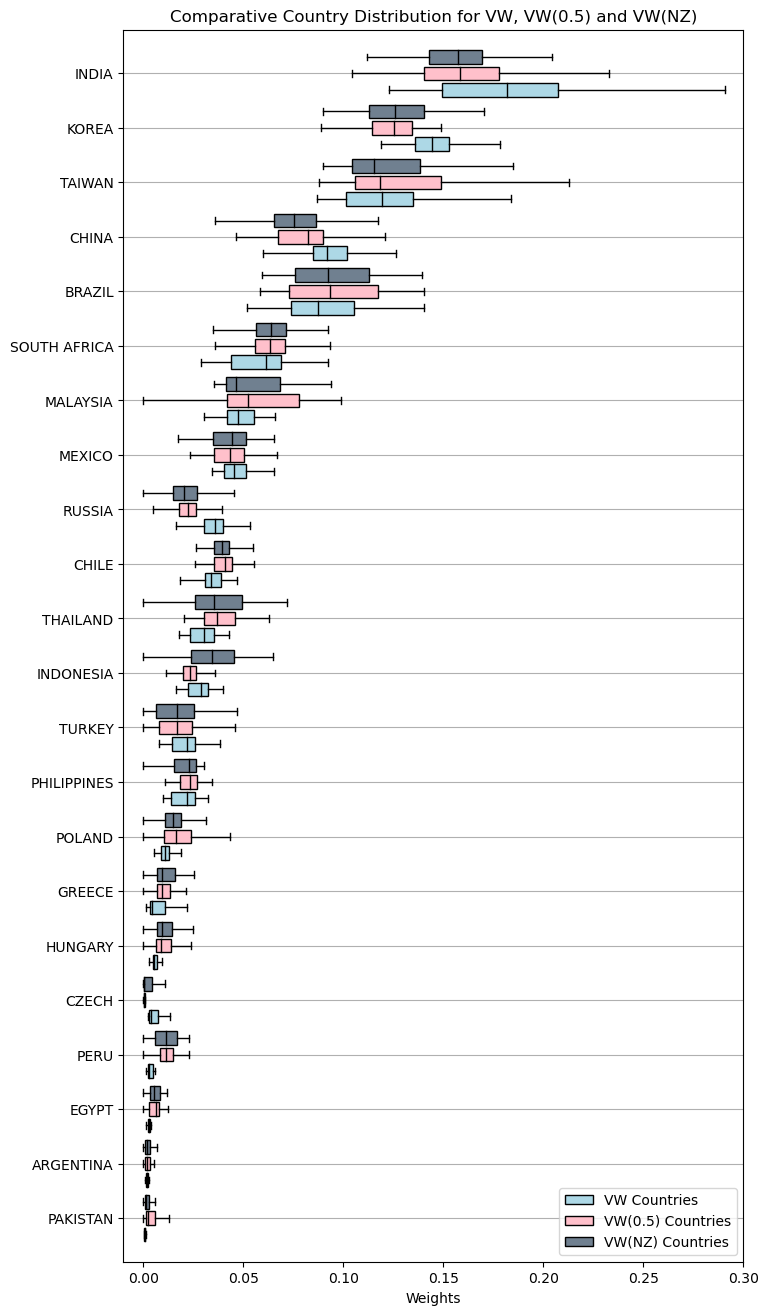

In [168]:
portfolio_weights_bp = pd.read_csv(savePaths['BP']['weights'], index_col=0, parse_dates=True)
static_info_sap = staticData.set_index('ISIN').loc[portfolio_weights_bp.columns]
merged_data_sap = portfolio_weights_bp.T.join(static_info_sap, how='left')
sector_weights_bp = merged_data_sap.groupby('Country').sum(numeric_only=True).T

portfolio_weights_bp_50R = pd.read_csv(savePaths['BP_50R']['weights'], index_col=0, parse_dates=True)
static_info_sap_50R = staticData.set_index('ISIN').loc[portfolio_weights_bp_50R.columns]
merged_data_sap_50R = portfolio_weights_bp_50R.T.join(static_info_sap_50R, how='left')
sector_weights_bp_50R = merged_data_sap_50R.groupby('Country').sum(numeric_only=True).T

portfolio_weights_sap_50R = pd.read_csv(savePaths['BP_TENZR']['weights'], index_col=0, parse_dates=True)
static_info_sap_50R = staticData.set_index('ISIN').loc[portfolio_weights_sap_50R.columns]
merged_data_sap_50R = portfolio_weights_sap_50R.T.join(static_info_sap_50R, how='left')
sector_weights_sap_50R = merged_data_sap_50R.groupby('Country').sum(numeric_only=True).T

common_sectors = sector_weights_bp.columns.intersection(sector_weights_bp_50R.columns)
data_group1 = sector_weights_bp[common_sectors]
data_group2 = sector_weights_bp_50R[common_sectors]
data_group3 = sector_weights_sap_50R[common_sectors]

alternative_labels = {'KOREA, REPUBLIC OF': 'KOREA', 
                      'TAIWAN, PROVINCE OF CHINA': 'TAIWAN', 
                      'RUSSIAN FEDERATION': 'RUSSIA', 
                      'CZECH REPUBLIC': 'CZECH'}

data_group1.rename(columns=alternative_labels, inplace=True)
data_group2.rename(columns=alternative_labels, inplace=True)
data_group3.rename(columns=alternative_labels, inplace=True)

# Calculate the sum of weights for each country and sort in descending order
total_weights = data_group1.sum(axis=0)
sorted_indices = total_weights.sort_values(ascending=True).index

# Reorder data groups and labels based on the sorted order
data_group1 = data_group1[sorted_indices]
data_group2 = data_group2[sorted_indices]
data_group3 = data_group3[sorted_indices]
labels = sorted_indices.tolist()

data_groups = [data_group1.values, data_group2.values, data_group3.values]

# matplotlib.rcParams["figure.dpi"] = 300
fig, ax = plt.subplots(figsize=(8, 16))
positions1 = [x - 0.3 for x in range(len(labels))]
positions2 = [x + 0.0 for x in range(len(labels))]
positions3 = [x + 0.3 for x in range(len(labels))]

bp1 = ax.boxplot(data_groups[0], positions=positions1, widths=0.25, vert=False, patch_artist=True, boxprops=dict(facecolor='lightblue'), showfliers=False, medianprops=dict(color='black'))
bp2 = ax.boxplot(data_groups[1], positions=positions2, widths=0.25, vert=False, patch_artist=True, boxprops=dict(facecolor='pink'), showfliers=False, medianprops=dict(color='black'))
bp3 = ax.boxplot(data_groups[2], positions=positions3, widths=0.25, vert=False, patch_artist=True, boxprops=dict(facecolor='slategrey'), showfliers=False, medianprops=dict(color='black'))

ax.set_yticks(range(len(labels)))
ax.set_yticklabels(labels)
ax.set_title('Comparative Country Distribution for VW, VW(0.5) and VW(NZ)')
# ax.set_ylabel('Countries')
ax.set_xlabel('Weights')
ax.set_xlim(-0.01, 0.3)
ax.grid(axis='y')
ax.legend([bp1["boxes"][0], bp2["boxes"][0], bp3["boxes"][0]], ['VW Countries', 'VW(0.5) Countries', 'VW(NZ) Countries'], loc='lower right')
plt.show()